<a href="https://colab.research.google.com/github/holstbone/NLP/blob/main/A_2_Assess_Clustering_LSA_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.2 Assess Clustering, LSA, LDA, and Classification



## Introduction and Perspective

In the previous Assignment, you obtained two different sets of vectors (actually, resultant matrices) representing the corpus that we created;

* ***tf-idf***: We had a tf-idf for each of the entire set of extracted terms in the entire corpus. Each vector field (one vector per document) represented the tf-idf for that specific term's occurrence within the corpus. A higher tf-idf meant that the term was both prevalent (across the corpus) and prominent (within at least one or more documents). Additionally, we had the term frequency for each of those terms within the document. 
* ***Word-embedding and Document embeddings***: Word embeddings provided insight into a low dimensional embedding of words and the document embedding showed us how the documents embedded in that low dimensional space also. 


In the last Assignment, you assessed these results against what you expected would be important terms, based on (1) your manual term extraction, (2) results of passing your documents through two different term extraction engines, and (3) observing what terms your colleagues found as important (which they posted to that week's Discussion). 

Now you will explore clustering and topic modeling.

## What to Do

Use the entire class corpus. Focus on ***clustering***, and ***analyze, assess, and interpret*** the outputs. If you spent a lot of time on the analysis of clustering for Assignment 1, use **clustering to help you establish class labels that you would then use for measuring the performance of your classification method and include this in your analysis.  So in this case it would be a two-step process.**

### Part 1: Clustering

The clusters are probably not what you would want if you were manually clustering the documents. Very likely, you have one or two very large, amoeba-like clusters that seem to include all topics. You probably have a couple of outliers. You may have some clusters that make sense. 

Even with the clusters that make sense, you can probably find:

Documents that are in a given cluster that you don't think should be there, and
Clusters that are missing certain documents that you think should have been included. 
Your mission (if you decide to accept it) is to assess the clusters, figure out what is "right" and what is "wrong" (or what needs to be fixed), and trace back the cause (as much as you can) to what was happening with the input vectors. 

You can work with clusters produced EITHER by the tf-idf OR the word-embedding (Doc2Vec) algorithm. 

Go back to the vector inputs corresponding to each of the documents. Did they contain sufficient terms and term frequency strengths (or term-representation, in the case of word-embedding) to give the results that you thought would make sense? 

What was not working quite right? 

This is the time to dig deeper and improve the results based on how you think these documents should cluster.  (I would strongly suggest you decide on the ground truth before performing this analysis, i.e. cluster by genre for example)

I would expect for this assignment you formally measure your method. 



### Step 2: Sentiment Analysis


Use the class corpus and do sentiment analysis for the positive and negative reviews. Try different vectorization methods. Try different classification methods also. Compare the methods and then recommend a specific vectorization method and a specific classification method.


### Step 3: Topic Modeling

Use the entire class corpus. Try LSA and LDA methods to do topic modeling, on the class corpus. Try several different number of topics. Try 2, 4, and other numbers. Look at the documents for the 2 topics. Do they correspond to positive and negative sentiments? If not, describe the 2 topics based on the top 10 words? Look at the documents for 4 topics. Do they correspond to genre?  If not, describe the 4 topics based on the top 10 words. Were you surprised with the results? if so, can you explain why? Describe your findings.


## Why Things Don't Work the Way You Want (the First Time)  


Very often, you can trace the causes to two factors: 

1. ***Terms that should be considered the same are not treated the same and sometimes "entity" terms are split up.*** For example, "country" and "countries" or "Trump" vs. "President Trump." There are likely enough term variants that it contributes to poor results. 

2. ***Something more subtle is going on.*** The essence is that you can see that a cluster needs to form around a certain concept, but that concept is not well-represented by the extracted terms. You'd need a more sophisticated approach. Think about what we have learned with regard to phrase extractions.

Your job, in essence, is to figure out what is not quite good enough with the simple algorithmic process that we've established so far, and identify things that you think would help this process in the future. 



## What to Present 


In your Report, you will ***recapitulate and summarize*** the points that you're making in this exercise. ***Identify*** key insights. ***Interpret*** analytic findings, as appropriate. You will present: 

The project that you were addressing, the challenges, and the data that you used. 
Your clustering and topic modeling method, and any interesting design considerations/challenges that you encountered, and how you solved them. 
Your experimental setup.
Your actual measured results together with your interpretation.


# Andy's Work Starts Here:

In [ ]:
!python --version

Python 3.7.11


## Load Python Libraries

In [ ]:
###############################################################################
### packages required to run code.  Make sure to install all required packages.
###############################################################################
import re, string
import nltk
from nltk.corpus import stopwords

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, silhouette_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.svm import SVC

import gensim
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import LsiModel,LdaModel, CoherenceModel
from gensim import similarities

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

In [ ]:
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The numpy version is {}.'.format(np.__version__))
print('The nltk version is {}.'.format(nltk.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The scikit learn version is {}.'.format(sklearn.__version__))
print('The gensim version is {}.'.format(gensim.__version__))
print('The re version is {}.'.format(re.__version__))

The matplotlib version is 3.2.2.
The numpy version is 1.19.5.
The nltk version is 3.2.5.
The pandas version is 1.1.5.
The scikit learn version is 0.22.2.post1.
The gensim version is 3.6.0.
The re version is 2.2.1.


In [ ]:
# Only run this once, they will be downloaded.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Load CSV (Class Corpus)

In [ ]:
# This section of the code prepares the required variables 
# to run functions set for each section of code

#read in class corpus csv into python
data=pd.read_csv('/content/drive/MyDrive/MSDS 453/A.1 - First Vectorized Representation (100 pts)/453_Sec56_Class_Corpus_v3_AH.csv')


### Manually convert text documents from Western European (Mac) and Western European (Windows), to Unicode (UTF-8)

In [ ]:
def get_corpus_text( path, titles ) :
    text_body=[]
    for doc in titles:
        filename = os.path.join( path, doc+'.txt' )
        # load text 
        files = os.listdir( path )
        #print(filename)
        file = open(filename, 'rt')#, encoding='utf-8-sig') 
        temp_text = file.read()
        file.close()
        text_body.append(temp_text)
        #print(len(text_body))
        
    return text_body

Make a copy of the original DataFrame, in case we need it later.

In [ ]:
data_v1 = data.copy()

In [ ]:
data_v1.columns

Index(['Doc_ID', 'DSI_Title', 'Text', 'Submission File Name', 'Student Name',
       'Genre of Movie', 'Review Type (pos or neg)', 'Movie Title'],
      dtype='object')

In [ ]:
data = data.drop(columns=['Text'])

Import the manually cleaned documents, which have been:

* Converted from Western European (Mac) and Western European (Windows), to Unicode (UTF-8).
* Stripped of metadata at the beginning of each review.

In [ ]:
zip_path = '/content/drive/MyDrive/MSDS 453/A.1 - First Vectorized Representation (100 pts)/Documents_AH_Manual_Clean.zip'
!cp "{zip_path}" .
!unzip -q Documents_AH_Manual_Clean.zip
!rm Documents_AH_Manual_Clean.zip

In [ ]:
FOLDER = "/content/Documents_AH_Manual_Clean"
titles = list(data['DSI_Title'])
text = get_corpus_text( FOLDER, titles )

In [ ]:
data.insert(2, 'Text', text)

In [ ]:
len(data['Text'])

200

## Functions to Process Text, Create TF-IDF Matrix, Word2Vec Matrix

In [ ]:
# Function used to clean text

def clean_doc(doc): 
    #split document into individual words
    tokens=doc.split()
    # prepare regex for char filtering 
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 4]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]         
    # word stemming    
    # ps=PorterStemmer()
    # tokens=[ps.stem(word) for word in tokens]
    return tokens



In [ ]:
# Function used to create final processed text (string of tokens)
def final_processed_text(doc):
    #this is a function to join the processed text back
    ' '.join(doc)
    return doc

In [ ]:
# Function to create a tf-idf tdm matrix

def tfidf(corpus, titles, ngram_range = (1,1)):
    #this is a function to created the tfidf matrix
    Tfidf=TfidfVectorizer(ngram_range=(1,1))

    #fit the vectorizer using final processed documents.  The vectorizer requires the 
    #stiched back together document.

    TFIDF_matrix=Tfidf.fit_transform(corpus)     

    #creating datafram from TFIDF Matrix
    words = Tfidf.get_feature_names()
    matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names(), index=titles)
    return matrix, words

In [ ]:
# Function to create Word2Vec Matrix

def word2vec(processed_text, size = 100):
    #This is a function to generate the word2vec matrix. Input parameters include the 
    #tokenized text and matrix size
    
    #word to vec
    model_w2v = Word2Vec(processed_text, size=100, window=5, min_count=1, workers=4)

    #join all processed DSI words into single list
    processed_text_w2v=[]
    for i in processed_text:
        for k in i:
            processed_text_w2v.append(k)

    #obtian all the unique words from DSI
    w2v_words=list(set(processed_text_w2v))

    #can also use the get_feature_names() from TFIDF to get the list of words
    #w2v_words=Tfidf.get_feature_names()

    #empty dictionary to store words with vectors
    w2v_vectors={}

    #for loop to obtain weights for each word
    for i in w2v_words:
        temp_vec=model_w2v.wv[i]
        w2v_vectors[i]=temp_vec

    #create a final dataframe to view word vectors
    w2v_df=pd.DataFrame(w2v_vectors).transpose()
    print(w2v_df)
    return w2v_df


### Creating the variables for processed tokens (`processed_text`) and string of tokens (`final_processed_text`)

In [ ]:
#adding columns to the dataframe to store the processed text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))

#create processed text that is a list of cleaned tokens
processed_text = data['processed_text'].tolist()

#create final processed text variable (string of tokens) for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]

#create titles variable for all titles in corpus
titles = data['DSI_Title'].tolist()

### Exploring Text Length across documents

In [ ]:
orig_lengths = []

for i in range(0,200):
  temp_length = len(data['Text'][i].split())
  orig_lengths.append(temp_length)

In [ ]:
processed_lengths = []

for i in range(0,200):
  temp_length = len(processed_text[i])
  processed_lengths.append(temp_length)

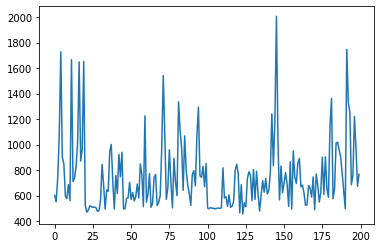

In [ ]:
plt.plot(data['Doc_ID'], orig_lengths)

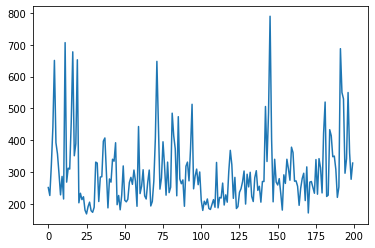

In [ ]:
plt.plot(data['Doc_ID'], processed_lengths)

### Arbitrarily cut reviews down to 500 words max

Make a copy of the original DataFrame, in case we need it later.

In [ ]:
data_untrunc = data.copy()

Cut each review down to 500 words maximum

In [ ]:
cut_text = []

for i in range(len(text)):
  temp_tokens = text[i].split()[0:500]
  temp_doc = ' '.join(temp_tokens)
  cut_text.append(temp_doc)

In [ ]:
data = data.drop(columns=['Text', 'processed_text'])

In [ ]:
data.insert(2, 'Text', cut_text)

In [ ]:
len(data['Text'])

200

### Re-Create the variables for processed tokens (`processed_text`) and string of tokens (`final_processed_text`)

In [ ]:
#adding columns to the dataframe to store the processed text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))

#create processed text that is a list of cleaned tokens
processed_text = data['processed_text'].tolist()

#create final processed text variable (string of tokens) for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]

#create titles variable for all titles in corpus
titles = data['DSI_Title'].tolist()

In [ ]:
orig_lengths = []

for i in range(0,200):
  temp_length = len(data['Text'][i].split())
  orig_lengths.append(temp_length)

In [ ]:
processed_lengths = []

for i in range(0,200):
  temp_length = len(processed_text[i])
  processed_lengths.append(temp_length)

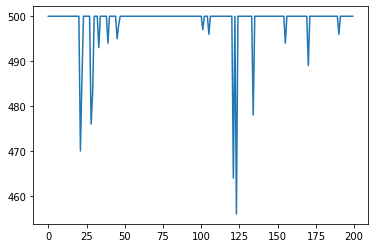

In [ ]:
plt.plot(data['Doc_ID'], orig_lengths)

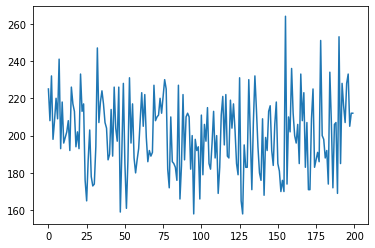

In [ ]:
plt.plot(data['Doc_ID'], processed_lengths)

Make a copy of the truncated DataFrame, in case we need it later.

In [ ]:
data_trunc = data.copy()

# Section 1: Clustering (from Week 3)

In [ ]:
#############################################
#Calculates tf idf
#Edit ngram range if you like
#############################################
def tfidf(corpus, titles, ngram_range = (1,1)):
    #this is a function to created the tfidf matrix
    Tfidf=TfidfVectorizer(stop_words='english', ngram_range = ngram_range)

    #fit the vectorizer using final processed documents.  The vectorizer requires the 
    #stiched back together document.

    TFIDF_matrix=Tfidf.fit_transform(corpus)     

    #creating datafram from TFIDF Matrix
    words = Tfidf.get_feature_names()
    matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names(), index=titles)
    return matrix, words



In [ ]:
#############################################
#Performs the k-means clustering of the tfidf matrix
#Edit the number of clusters
#############################################
def k_means_tfidf(tfidf_matrix,terms,titles,final_processed_text, k=10):
    
    #this is a function to generate the k-means output using the tfidf matrix.  Inputs 
    #to the function include: titles of text, processed text, and desired k value. 
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

    #print("Top terms per cluster:")
    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

    terms_dict=[]


    #save the terms for each cluster and document to dictionaries.  To be used later
    #for plotting output.

    #dictionary to store terms and titles
    cluster_terms={}
    cluster_title={}


    for i in range(k):
        #print("Cluster %d:" % i),
        temp_terms=[]
        temp_titles=[]
        for ind in order_centroids[i, :10]:
            #print(' %s' % terms[ind])
            terms_dict.append(terms[ind])
            temp_terms.append(terms[ind])
        cluster_terms[i]=temp_terms

        #print("Cluster %d titles:" % i, end='')
        temp=frame[frame['Cluster']==i]
        for title in temp['Doc Name']:
            #print(' %s,' % title, end='')
            temp_titles.append(title)
        cluster_title[i]=temp_titles

    return cluster_terms, cluster_title


## EXPERIMENT 1: TF-IDF Clustering with unigrams, 20 topics

In [ ]:
tfidf_matrix_1, terms_1 = tfidf(final_processed_text, titles, (1,1))

In [ ]:
cluster_terms_1, cluster_titles_1 = k_means_tfidf(tfidf_matrix_1,terms_1,titles,final_processed_text, k=20)

In [ ]:
cluster_titles_1_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cluster_titles_1.items() ]))

In [ ]:
cluster_titles_1_df.to_csv('cluster_titles_1.csv')

## EXPERIMENT 2: TF-IDF Clustering with bigrams, 20 topics

In [ ]:
tfidf_matrix_2, terms_2 = tfidf(final_processed_text, titles, (1,2))

In [ ]:
cluster_terms_2, cluster_titles_2 = k_means_tfidf(tfidf_matrix_2,terms_2,titles,final_processed_text, k=20)

In [ ]:
cluster_titles_2_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cluster_titles_2.items() ]))

In [ ]:
cluster_titles_2_df.to_csv('cluster_titles_2.csv')

## EXPERIMENT 3: TF-IDF Clustering with trigrams, 20 topics

In [ ]:
tfidf_matrix_3, terms_3 = tfidf(final_processed_text, titles, (1,3))

In [ ]:
cluster_terms_3, cluster_titles_3 = k_means_tfidf(tfidf_matrix_3,terms_3,titles,final_processed_text, k=20)

In [ ]:
cluster_titles_3_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cluster_titles_3.items() ]))

In [ ]:
cluster_titles_3_df.to_csv('cluster_titles_3.csv')

## EXPERIMENT 4: TF-IDF Clustering with bigrams, 4 topics

In [ ]:
tfidf_matrix_4, terms_4 = tfidf(final_processed_text, titles, (1,2))

In [ ]:
cluster_terms_4, cluster_titles_4 = k_means_tfidf(tfidf_matrix_4,terms_4,titles,final_processed_text, k=4)

In [ ]:
cluster_titles_4_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cluster_titles_4.items() ]))

In [ ]:
cluster_titles_4_df.to_csv('cluster_titles_4.csv')

## EXPERIMENT 5: Silhouette Scores for TF-IDF Clustering (using Experiment 1 TF-IDF Matrix)

In [ ]:
#implementation of silhouette score to measure the most optimal number of clusters

k_list = [2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

#silhoutte score list
sil_scores = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix_1)
    labels = km.labels_.tolist()
    score = silhouette_score(tfidf_matrix_1, labels)
    sil_scores.append(score)
    
    


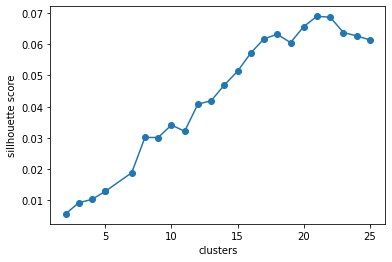

In [ ]:
#plot silhouette scores in chart

import matplotlib.pyplot as plt


plt.scatter(k_list, sil_scores)
plt.plot(k_list, sil_scores)
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.show()

## EXPERIMENT 6: Silhouette Scores for TF-IDF Clustering (using the UnTruncated Documents)

In [ ]:
#create processed text that is a list of cleaned tokens
processed_text_untrunc = data_untrunc['processed_text'].tolist()

#create final processed text variable (string of tokens) for matrix creation
final_processed_text_untrunc = [' '.join(x) for x in data_untrunc['processed_text'].tolist()]

#create titles variable for all titles in corpus
titles_untrunc = data_untrunc['DSI_Title'].tolist()

In [ ]:
tfidf_matrix_untrunc, terms_untrunc = tfidf(final_processed_text_untrunc, titles_untrunc, (1,1))

In [ ]:
#implementation of silhouette score to measure the most optimal number of clusters

k_list = [2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

#silhoutte score list
sil_scores = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state =89)
    km.fit(tfidf_matrix_untrunc)
    labels = km.labels_.tolist()
    score = silhouette_score(tfidf_matrix_untrunc, labels)
    sil_scores.append(score)
    
    


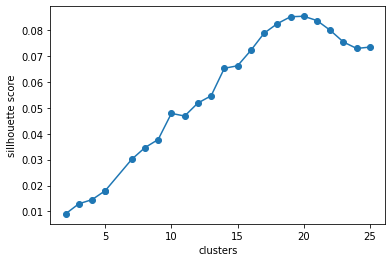

In [ ]:
#plot silhouette scores in chart

import matplotlib.pyplot as plt


plt.scatter(k_list, sil_scores)
plt.plot(k_list, sil_scores)
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.show()

## EXPERIMENT 7: TF-IDF Clustering with unigrams, 20 topics (on untruncated docs)

In [ ]:
tfidf_matrix_7, terms_7 = tfidf(final_processed_text_untrunc, titles_untrunc, (1,1))

In [ ]:
cluster_terms_7, cluster_titles_7 = k_means_tfidf(tfidf_matrix_7,terms_7,titles,final_processed_text_untrunc, k=20)

In [ ]:
cluster_titles_7_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cluster_titles_7.items() ]))

In [ ]:
cluster_titles_7_df.to_csv('cluster_titles_7.csv')

## EXPERIMENT 7R: TF-IDF Clustering with trigrams, 20 topics (on untruncated docs)

In [ ]:
tfidf_matrix_7, terms_7 = tfidf(final_processed_text_untrunc, titles_untrunc, (1,3))

In [ ]:
cluster_terms_7, cluster_titles_7 = k_means_tfidf(tfidf_matrix_7,terms_7,titles,final_processed_text_untrunc, k=20)

In [ ]:
cluster_titles_7_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cluster_titles_7.items() ]))

In [ ]:
cluster_titles_7_df.to_csv('cluster_titles_7.csv')

## EXPERIMENT 8: Doc2Vec Clustering, 2 topics (On Truncated Documents)

In [ ]:
#############################################
#Explore K-means clustering of doc2vec matrix
#############################################
def doc2vec_with_titles(corpus, processed_text, titles, vector_size = 100):
    #function to created doc2vec matrix
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]

    model = Doc2Vec(documents, vector_size=100, window=3, min_count=2, workers=4)

    doc2vec_df=pd.DataFrame()
    for i in range(0,len(processed_text)):
        vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
        doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

    doc2vec_df=doc2vec_df.reset_index()

    doc_titles={'title': titles}
    t=pd.DataFrame(doc_titles)

    doc2vec_df=pd.concat([doc2vec_df,t], axis=1)

    doc2vec_df=doc2vec_df.drop('index', axis=1)
    return doc2vec_df



In [ ]:
def k_means_doc2vec(doc2vec_df, final_processed_text,titles, k = 5):
    
    #this is a funciton to create the k_means outputs using the doc2vec matrics.  Required inputs
    #include the doc2vec matrix, and desired number of clusters.
    doc2vec_k_means=doc2vec_df.drop('title', axis=1)

    km = KMeans(n_clusters=k, random_state =89)
    km.fit(doc2vec_k_means)

    clusters_d2v = km.labels_.tolist()

    Dictionary={'Doc Name':titles, 'Cluster':clusters_d2v,  'Text': final_processed_text}
    frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

    #dictionary to store clusters and respective titles
    cluster_title={}

    #note doc2vec clusters will not have individual words due to the vector representation
    #is based on the entire document not indvidual words. As a result, there won't be individual
    #word outputs from each cluster.   
    for i in range(k):
        #print("Cluster %d:" % i)
        temp=frame[frame['Cluster']==i]
        temp_title_list=[]
        for title in temp['Doc Name']:
            #print(' %s ' % title, end='\n')
            temp_title_list.append(title)
        cluster_title[i]=temp_title_list
    return cluster_title 



In [ ]:
doc2vec_model = doc2vec_with_titles(final_processed_text, processed_text,titles, 100)
doc2vec_model.index = titles
cluster_titles_8 = k_means_doc2vec(doc2vec_model, final_processed_text,titles, k = 2)

In [ ]:
cluster_titles_8_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cluster_titles_8.items() ]))

In [ ]:
cluster_titles_8_df.to_csv('cluster_titles_8.csv')

In [ ]:
#implementation of silhouette score to measure the most optimal number of clusters

k_list = [2,3,4,5,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
doc2vec_k_means=doc2vec_model.drop('title', axis=1)
#silhoutte score list
sil_scores = []

for k in k_list:
    km = KMeans(n_clusters=k, random_state =89)

    km.fit(doc2vec_k_means)
    labels = km.labels_.tolist()
    score = silhouette_score(doc2vec_k_means, labels)
    sil_scores.append(score)
    
    


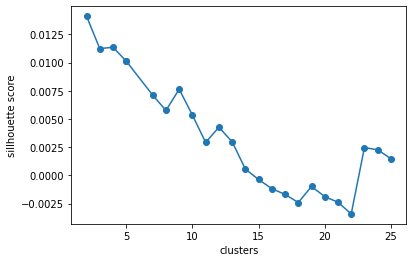

In [ ]:
#plot silhouette scores in chart

import matplotlib.pyplot as plt


plt.scatter(k_list, sil_scores)
plt.plot(k_list, sil_scores)
plt.xlabel("clusters")
plt.ylabel("sillhouette score")
plt.show()

## EXPERIMENT 9: Predict Positive/Negative Reviews (Untruncated Text)

Roll back to "uncut" data

In [ ]:
data = data_untrunc.copy()

### Re-Create the variables for processed tokens (`processed_text`) and string of tokens (`final_processed_text`)

In [ ]:
#adding columns to the dataframe to store the processed text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))

#create processed text that is a list of cleaned tokens
processed_text = data['processed_text'].tolist()

#create final processed text variable (string of tokens) for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]

#create titles variable for all titles in corpus
titles = data['DSI_Title'].tolist()

In [ ]:
data.head(1)

Doc_ID  ...                                     processed_text
0       0  ...  [canadian, director, denis, villeneuve, great,...

[1 rows x 9 columns]

In [ ]:
data['Labels'] = np.where(data['Review Type (pos or neg)'] == 'Negative', 0, 1)


In [ ]:
sum(data['Labels'])

100

In [ ]:
inputs = data['Text']
labels = data['Labels']

In [ ]:
tfidf_matrix, tfidf_words = tfidf(inputs, titles, ngram_range = (1,1))

In [ ]:
indices = np.arange(tfidf_matrix.shape[0])

In [ ]:
tfidf_matrix = tfidf_matrix.set_index(indices)

In [ ]:
indices = np.arange(tfidf_matrix.shape[0])
np.random.shuffle(indices)
inputs = tfidf_matrix.iloc[indices]
labels = labels[indices]

x_train = inputs[:170]
y_train = labels[:170]
x_test = inputs[170:]
y_test = labels[170:]
print(x_train.shape)
print(x_test.shape)

(170, 15232)
(30, 15232)


### ***Random Forests:***



#### **Develop a Random Forest to predict the sentiment (positive/negative)**


Calculate the accuracy of the model on both the training and test data set

In [ ]:
"""
RANDOM FOREST
"""

exp_9_RF = RandomForestClassifier(max_depth = 3,
                                 n_estimators = 10, 
                                 max_features = "sqrt",
                                 )
exp_9_RF = exp_9_RF.fit( x_train, y_train )

Y_Pred_train = exp_9_RF.predict(x_train)
Y_Pred_test = exp_9_RF.predict(x_test)

print("\n=============\n")
print("RANDOM FOREST\n")
print("Accuracy Train:",metrics.accuracy_score(y_train, Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(y_test, Y_Pred_test))
print("\n")



RANDOM FOREST

Accuracy Train: 0.7823529411764706
Accuracy Test: 0.5




Create a graph that shows the ROC curves for both the training and test data set. Clearly label each curve and display the Area Under the ROC curve.


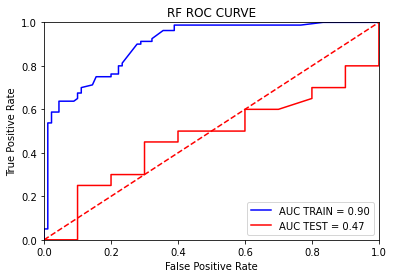

In [ ]:
probs = exp_9_RF.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train, p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = exp_9_RF.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test, p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_9_RF = fpr_test
tpr_9_RF = tpr_test
auc_9_RF = roc_auc_test

plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Predictions

In [ ]:
pred_classes = exp_9_RF.predict(x_test)
print('shape of preds: ', pred_classes.shape)
pred_classes

shape of preds:  (30,)


array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
np.array(y_test)

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1])

#### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 7,  3],
       [12,  8]], dtype=int32)>

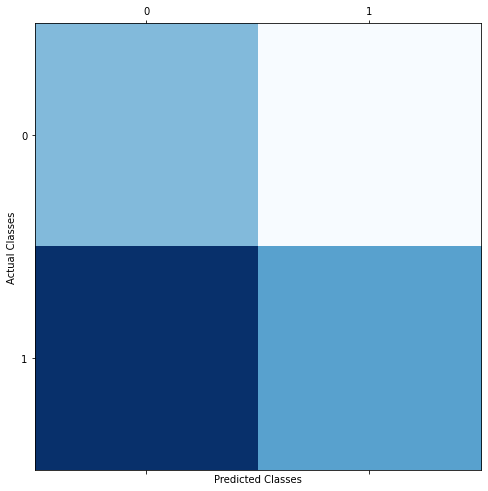

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

#### Classification Report

In [ ]:
report_9_RF = classification_report(y_test, Y_Pred_test)

In [ ]:
print(report_9_RF)

              precision    recall  f1-score   support

           0       0.37      0.70      0.48        10
           1       0.73      0.40      0.52        20

    accuracy                           0.50        30
   macro avg       0.55      0.55      0.50        30
weighted avg       0.61      0.50      0.51        30



### ***Gradient Boosting:***



#### **Develop a Gradient Boosting to predict the sentiment (positive/negative)**


Calculate the accuracy of the model on both the training and test data set

In [ ]:
"""
GRADIENT BOOSTING
"""

exp_9_GB = GradientBoostingClassifier()
exp_9_GB = exp_9_GB.fit( x_train, y_train )

Y_Pred_train = exp_9_GB.predict(x_train)
Y_Pred_test = exp_9_GB.predict(x_test)

print("\n=============\n")
print("GRADIENT BOOSTING\n")
print("Accuracy Train:",metrics.accuracy_score(y_train, Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(y_test, Y_Pred_test))
print("\n")



GRADIENT BOOSTING

Accuracy Train: 1.0
Accuracy Test: 0.6333333333333333




Create a graph that shows the ROC curves for both the training and test data set. Clearly label each curve and display the Area Under the ROC curve.

This is the same Python code as the Decision Tree ML Model above, except:

* **After calculating these metrics, we store them for future analysis in `fpr_RF`, `tpr_RF`, and `auc_RF`.**


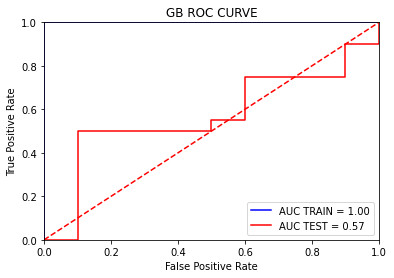

In [ ]:
probs = exp_9_GB.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train, p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = exp_9_GB.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test, p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_9_GB = fpr_test
tpr_9_GB = tpr_test
auc_9_GB = roc_auc_test

plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Predictions

In [ ]:
pred_classes = exp_9_GB.predict(x_test)
print('shape of preds: ', pred_classes.shape)
pred_classes

shape of preds:  (30,)


array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
np.array(y_test)

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1])

#### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 9,  1],
       [10, 10]], dtype=int32)>

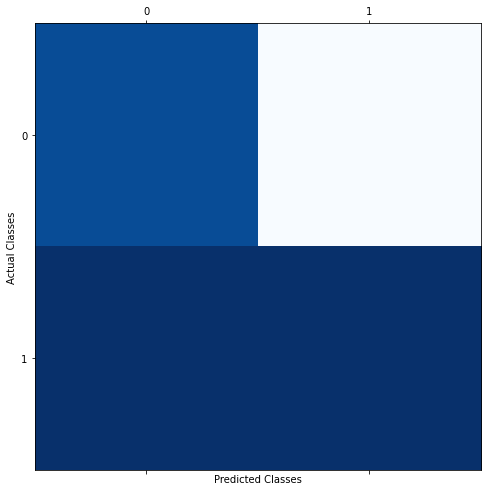

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

#### Classification Report

In [ ]:
report_9_GB = classification_report(y_test, Y_Pred_test)

In [ ]:
print(report_9_GB)

              precision    recall  f1-score   support

           0       0.47      0.90      0.62        10
           1       0.91      0.50      0.65        20

    accuracy                           0.63        30
   macro avg       0.69      0.70      0.63        30
weighted avg       0.76      0.63      0.64        30



### SVM

In [ ]:
# Classifier Algorithm - SVM

# Create instance of SVM

SVM_exp_9 = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_exp_9.fit(x_train, y_train)

# Predict the labels on the test dataset
pred_exp_9_SVM = SVM_exp_9.predict(x_test)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score", accuracy_score(pred_exp_9_SVM, y_test)*100)

SVM Accuracy Score 20.0


#### Predictions

In [ ]:
pred_classes = pred_exp_9_SVM
print('shape of preds: ', pred_classes.shape)
pred_classes

shape of preds:  (30,)


array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
np.array(y_test)

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1])

#### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 4,  6],
       [18,  2]], dtype=int32)>

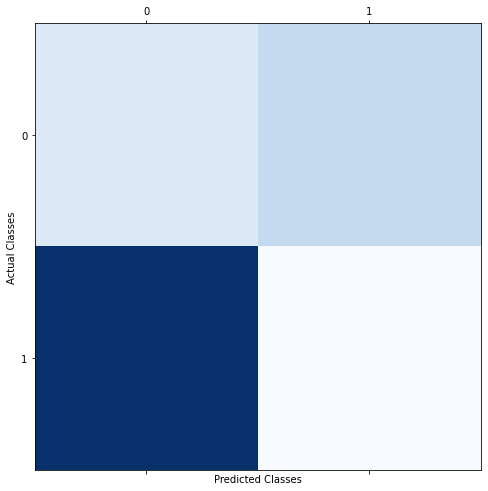

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

#### Classification Report

In [ ]:
report_9_SVM = classification_report(y_test, Y_Pred_test)

In [ ]:
print(report_9_SVM)

              precision    recall  f1-score   support

           0       0.47      0.90      0.62        10
           1       0.91      0.50      0.65        20

    accuracy                           0.63        30
   macro avg       0.69      0.70      0.63        30
weighted avg       0.76      0.63      0.64        30



## EXPERIMENT 10: Predict Positive/Negative Reviews (Truncated Text)

Roll back to "truncated" data

In [ ]:
data = data_trunc.copy()

### Re-Create the variables for processed tokens (`processed_text`) and string of tokens (`final_processed_text`)

In [ ]:
#adding columns to the dataframe to store the processed text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))

#create processed text that is a list of cleaned tokens
processed_text = data['processed_text'].tolist()

#create final processed text variable (string of tokens) for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]

#create titles variable for all titles in corpus
titles = data['DSI_Title'].tolist()

In [ ]:
data.head(1)

Doc_ID  ...                                     processed_text
0       0  ...  [canadian, director, denis, villeneuve, great,...

[1 rows x 9 columns]

In [ ]:
data['Labels'] = np.where(data['Review Type (pos or neg)'] == 'Negative', 0, 1)


In [ ]:
sum(data['Labels'])

100

In [ ]:
inputs = data['Text']
labels = data['Labels']

In [ ]:
tfidf_matrix, tfidf_words = tfidf(inputs, titles, ngram_range = (1,1))

In [ ]:
indices = np.arange(tfidf_matrix.shape[0])

In [ ]:
tfidf_matrix = tfidf_matrix.set_index(indices)

In [ ]:
indices = np.arange(tfidf_matrix.shape[0])
np.random.shuffle(indices)
inputs = tfidf_matrix.iloc[indices]
labels = labels[indices]

x_train = inputs[:170]
y_train = labels[:170]
x_test = inputs[170:]
y_test = labels[170:]
print(x_train.shape)
print(x_test.shape)

(170, 12253)
(30, 12253)


### ***Random Forests:***



#### **Develop a Random Forest to predict the sentiment (positive/negative)**


Calculate the accuracy of the model on both the training and test data set

In [ ]:
"""
RANDOM FOREST
"""

exp_9_RF = RandomForestClassifier(max_depth = 3,
                                 n_estimators = 10, 
                                 max_features = "sqrt",
                                 )
exp_9_RF = exp_9_RF.fit( x_train, y_train )

Y_Pred_train = exp_9_RF.predict(x_train)
Y_Pred_test = exp_9_RF.predict(x_test)

print("\n=============\n")
print("RANDOM FOREST\n")
print("Accuracy Train:",metrics.accuracy_score(y_train, Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(y_test, Y_Pred_test))
print("\n")



RANDOM FOREST

Accuracy Train: 0.7705882352941177
Accuracy Test: 0.43333333333333335




Create a graph that shows the ROC curves for both the training and test data set. Clearly label each curve and display the Area Under the ROC curve.


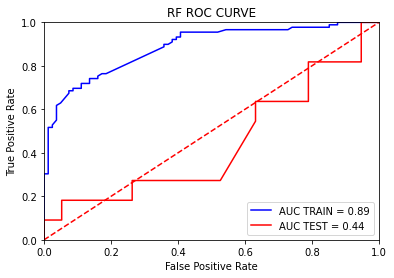

In [ ]:
probs = exp_9_RF.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train, p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = exp_9_RF.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test, p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_9_RF = fpr_test
tpr_9_RF = tpr_test
auc_9_RF = roc_auc_test

plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Predictions

In [ ]:
pred_classes = exp_9_RF.predict(x_test)
print('shape of preds: ', pred_classes.shape)
pred_classes

shape of preds:  (30,)


array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1])

In [ ]:
np.array(y_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0])

#### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 7, 12],
       [ 5,  6]], dtype=int32)>

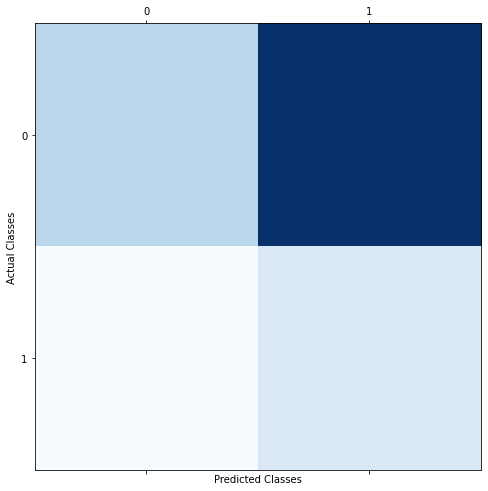

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Classification Report

In [ ]:
report_9_RF = classification_report(y_test, Y_Pred_test)

In [ ]:
print(report_9_RF)

              precision    recall  f1-score   support

           0       0.58      0.37      0.45        19
           1       0.33      0.55      0.41        11

    accuracy                           0.43        30
   macro avg       0.46      0.46      0.43        30
weighted avg       0.49      0.43      0.44        30



### ***Gradient Boosting:***



#### **Develop a Gradient Boosting to predict the sentiment (positive/negative)**


Calculate the accuracy of the model on both the training and test data set

In [ ]:
"""
GRADIENT BOOSTING
"""

exp_9_GB = GradientBoostingClassifier()
exp_9_GB = exp_9_GB.fit( x_train, y_train )

Y_Pred_train = exp_9_GB.predict(x_train)
Y_Pred_test = exp_9_GB.predict(x_test)

print("\n=============\n")
print("GRADIENT BOOSTING\n")
print("Accuracy Train:",metrics.accuracy_score(y_train, Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(y_test, Y_Pred_test))
print("\n")



GRADIENT BOOSTING

Accuracy Train: 1.0
Accuracy Test: 0.5




Create a graph that shows the ROC curves for both the training and test data set. Clearly label each curve and display the Area Under the ROC curve.

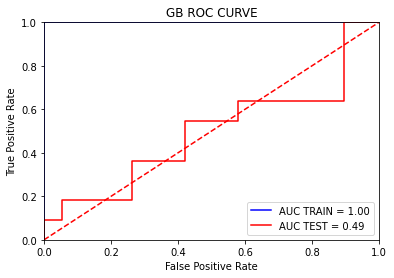

In [ ]:
probs = exp_9_GB.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train, p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = exp_9_GB.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test, p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_9_GB = fpr_test
tpr_9_GB = tpr_test
auc_9_GB = roc_auc_test

plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Predictions

In [ ]:
pred_classes = exp_9_GB.predict(x_test)
print('shape of preds: ', pred_classes.shape)
pred_classes

shape of preds:  (30,)


array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
np.array(y_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0])

#### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 9, 10],
       [ 5,  6]], dtype=int32)>

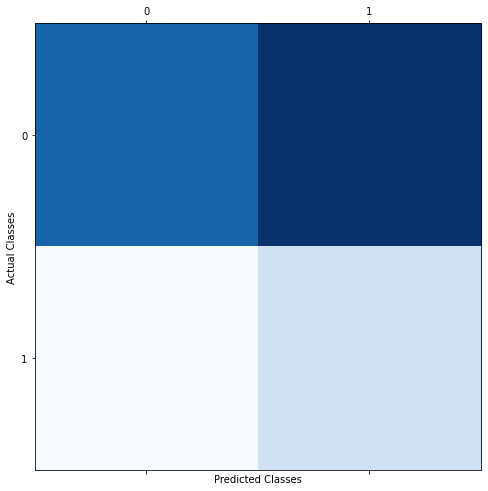

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

#### Classification Report

In [ ]:
report_9_GB = classification_report(y_test, Y_Pred_test)

In [ ]:
print(report_9_GB)

              precision    recall  f1-score   support

           0       0.64      0.47      0.55        19
           1       0.38      0.55      0.44        11

    accuracy                           0.50        30
   macro avg       0.51      0.51      0.49        30
weighted avg       0.54      0.50      0.51        30



### SVM

In [ ]:
# Classifier Algorithm - SVM

# Create instance of SVM

SVM_exp_9 = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_exp_9.fit(x_train, y_train)

# Predict the labels on the test dataset
pred_exp_9_SVM = SVM_exp_9.predict(x_test)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score", accuracy_score(pred_exp_9_SVM, y_test)*100)

SVM Accuracy Score 26.666666666666668


#### Predictions

In [ ]:
pred_classes = pred_exp_9_SVM
print('shape of preds: ', pred_classes.shape)
pred_classes

shape of preds:  (30,)


array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
np.array(y_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0])

#### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 1, 18],
       [ 4,  7]], dtype=int32)>

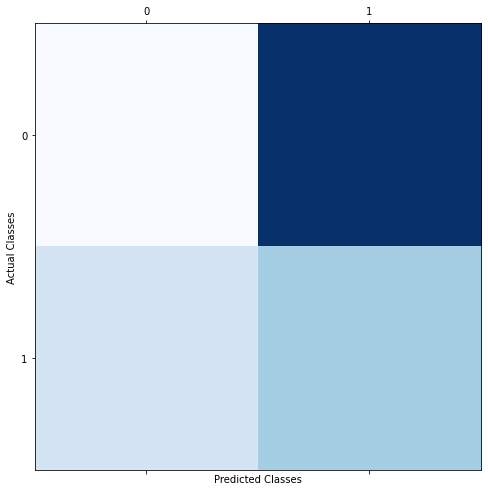

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

#### Classification Report

In [ ]:
report_9_SVM = classification_report(y_test, Y_Pred_test)

In [ ]:
print(report_9_SVM)

              precision    recall  f1-score   support

           0       0.64      0.47      0.55        19
           1       0.38      0.55      0.44        11

    accuracy                           0.50        30
   macro avg       0.51      0.51      0.49        30
weighted avg       0.54      0.50      0.51        30



# Section 3: Latent Semantic Analysis and Latent Dirichlet Allocation

## EXPERIMENT 11: Latent Semantic Analysis (Truncated Text)

Roll back to "truncated" data

In [ ]:
data = data_trunc.copy()

### Re-Create the variables for processed tokens (`processed_text`) and string of tokens (`final_processed_text`)

In [ ]:
#adding columns to the dataframe to store the processed text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))

#create processed text that is a list of cleaned tokens
processed_text = data['processed_text'].tolist()

#create final processed text variable (string of tokens) for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]

#create titles variable for all titles in corpus
titles = data['DSI_Title'].tolist()

In [ ]:
#Section 3A: Latent Semantic Analysis Using Gensim's implementation

def create_gensim_lsa_model(doc_clean,number_of_topics,words):

    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    index = similarities.MatrixSimilarity(lsamodel[doc_term_matrix])

    return lsamodel,dictionary,index



In [ ]:
#Section 3A: Latent Semantic Analysis Example
def lsa(tfidf_matrix, terms, n_components = 10):
    #this is a function to execute lsa.  inputs to the function include the tfidf matrix and
    #the desired number of components.
    
    LSA = TruncatedSVD(n_components=10)

    LSA.fit(tfidf_matrix)


    for i, comp in enumerate(LSA.components_):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
        print("Topic "+str(i)+": ")
        for t in sorted_terms:
            print(t[0])



In [ ]:
def plot_lsa(number_of_topics, words):

    ######################################
    #Function to plot the LSA based on user defined numbrer of topics and words
    #EXPERIMENT WITH THESE PARAMETERS topics and words

    #####################################
    model,dictionary,index=create_gensim_lsa_model(processed_text,number_of_topics,words)

    for doc in processed_text:
        vec_bow = dictionary.doc2bow(doc)
        vec_lsi = model[vec_bow]  # convert the query to LSI space
        sims = index[vec_lsi] # perform a similarity query against the corpus

    fig, ax = plt.subplots(figsize=(50, 50))
    cax = ax.matshow(index, interpolation='nearest')
    ax.grid(True)
    plt.xticks(range(len(processed_text)), titles, rotation=90);
    plt.yticks(range(len(processed_text)), titles);
    fig.colorbar(cax)
    plt.show()
    return model
    

In [ ]:
#plotting 4 topics and 10 words
model_6topic_10words = plot_lsa(4, 10)

In [ ]:
#compare LSA model coherence

topics = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
coherence_values = []
for t in topics:
    lsamodel,dictionary,index = create_gensim_lsa_model(processed_text,t,10)


    coherence_model_lsa = CoherenceModel(model=lsamodel, dictionary=dictionary, texts=processed_text, coherence='c_v')
    coherence_lsa = coherence_model_lsa.get_coherence()
    coherence_values.append(coherence_lsa)

    
coherence ={'2  topic 10 words':coherence_values[0],
            '4  topic 10 words':coherence_values[1],
            '6  topic 10 words':coherence_values[2],
            '8  topic 10 words':coherence_values[3],
            '10 topic 10 words':coherence_values[4],
            '12 topic 10 words':coherence_values[5],
            '14 topic 10 words':coherence_values[6],
            '16 topic 10 words':coherence_values[7],
            '18 topic 10 words':coherence_values[8],
            '20 topic 10 words':coherence_values[9],
            '22 topic 10 words':coherence_values[10],
            '24 topic 10 words':coherence_values[11],}   

print(coherence)

[(0, '0.422*"movie" + 0.191*"story" + 0.172*"first" + 0.151*"movies" + 0.117*"family" + 0.114*"character" + 0.111*"world" + 0.111*"action" + 0.109*"something" + 0.109*"never"'), (1, '-0.274*"conjuring" + -0.271*"movie" + -0.217*"kevin" + -0.202*"family" + -0.182*"alone" + -0.170*"house" + 0.166*"world" + 0.161*"action" + -0.151*"horror" + -0.143*"devil"')]
[(0, '0.422*"movie" + 0.191*"story" + 0.172*"first" + 0.151*"movies" + 0.117*"family" + 0.114*"character" + 0.111*"world" + 0.111*"action" + 0.109*"something" + 0.109*"never"'), (1, '0.273*"conjuring" + 0.271*"movie" + 0.217*"kevin" + 0.202*"family" + 0.182*"alone" + 0.171*"house" + -0.166*"world" + -0.162*"action" + 0.151*"horror" + 0.142*"devil"'), (2, '-0.351*"conjuring" + 0.321*"kevin" + 0.281*"family" + 0.280*"alone" + -0.209*"movie" + -0.189*"devil" + 0.182*"house" + 0.165*"hughes" + -0.160*"warrens" + 0.138*"christmas"'), (3, '-0.393*"cruella" + 0.184*"cooper" + 0.176*"conjuring" + 0.153*"interstellar" + -0.152*"character" + -

## EXPERIMENT 12: Latent Dirichlet Allocation (Truncated Text)

In [ ]:
#Section 3B: Latent Dirichlet Allocation
def lda(tfidf_matrix, terms, topics = 3, num_words = 10):
    #this is a function to perform lda on the tfidf matrix.  function varibales include:
    #tfidf matrix, desired number of topic, and number of words per topic.

    topics = 4
    num_words = 10
    lda = LatentDirichletAllocation(n_components=topics).fit(tfidf_matrix)

    topic_dict = {}
    for topic_num, topic in enumerate(lda.components_):
        topic_dict[topic_num] = " ".join([terms[i]for i in topic.argsort()[:-num_words - 1:-1]])

    print(topic_dict)

In [ ]:
#Section 3B:  Latent Dirichlet Allocation Using Gensim's implementation
def create_gensim_lda_model(doc_clean,number_of_topics,words):

    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LSA model
    ldamodel = LdaModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)
    # train model
    print(ldamodel.print_topics(num_topics=number_of_topics, num_words=words))
    index = similarities.MatrixSimilarity(ldamodel[doc_term_matrix])



    return ldamodel,dictionary,index,doc_term_matrix



[(0, '0.007*"movie" + 0.004*"story" + 0.003*"first" + 0.003*"movies" + 0.003*"conjuring" + 0.003*"character" + 0.002*"never" + 0.002*"family" + 0.002*"another" + 0.002*"world"'), (1, '0.005*"movie" + 0.003*"would" + 0.003*"first" + 0.002*"movies" + 0.002*"alone" + 0.002*"story" + 0.002*"world" + 0.002*"makes" + 0.002*"something" + 0.002*"house"'), (2, '0.006*"movie" + 0.004*"story" + 0.003*"movies" + 0.002*"something" + 0.002*"first" + 0.002*"character" + 0.002*"little" + 0.002*"family" + 0.002*"apatow" + 0.002*"though"'), (3, '0.006*"movie" + 0.004*"first" + 0.004*"story" + 0.003*"world" + 0.003*"family" + 0.003*"something" + 0.003*"action" + 0.002*"never" + 0.002*"movies" + 0.002*"films"'), (4, '0.004*"movie" + 0.003*"first" + 0.003*"story" + 0.002*"horror" + 0.002*"movies" + 0.002*"world" + 0.002*"little" + 0.002*"never" + 0.002*"would" + 0.002*"could"'), (5, '0.009*"movie" + 0.004*"first" + 0.003*"action" + 0.003*"story" + 0.002*"character" + 0.002*"horror" + 0.002*"something" + 0.

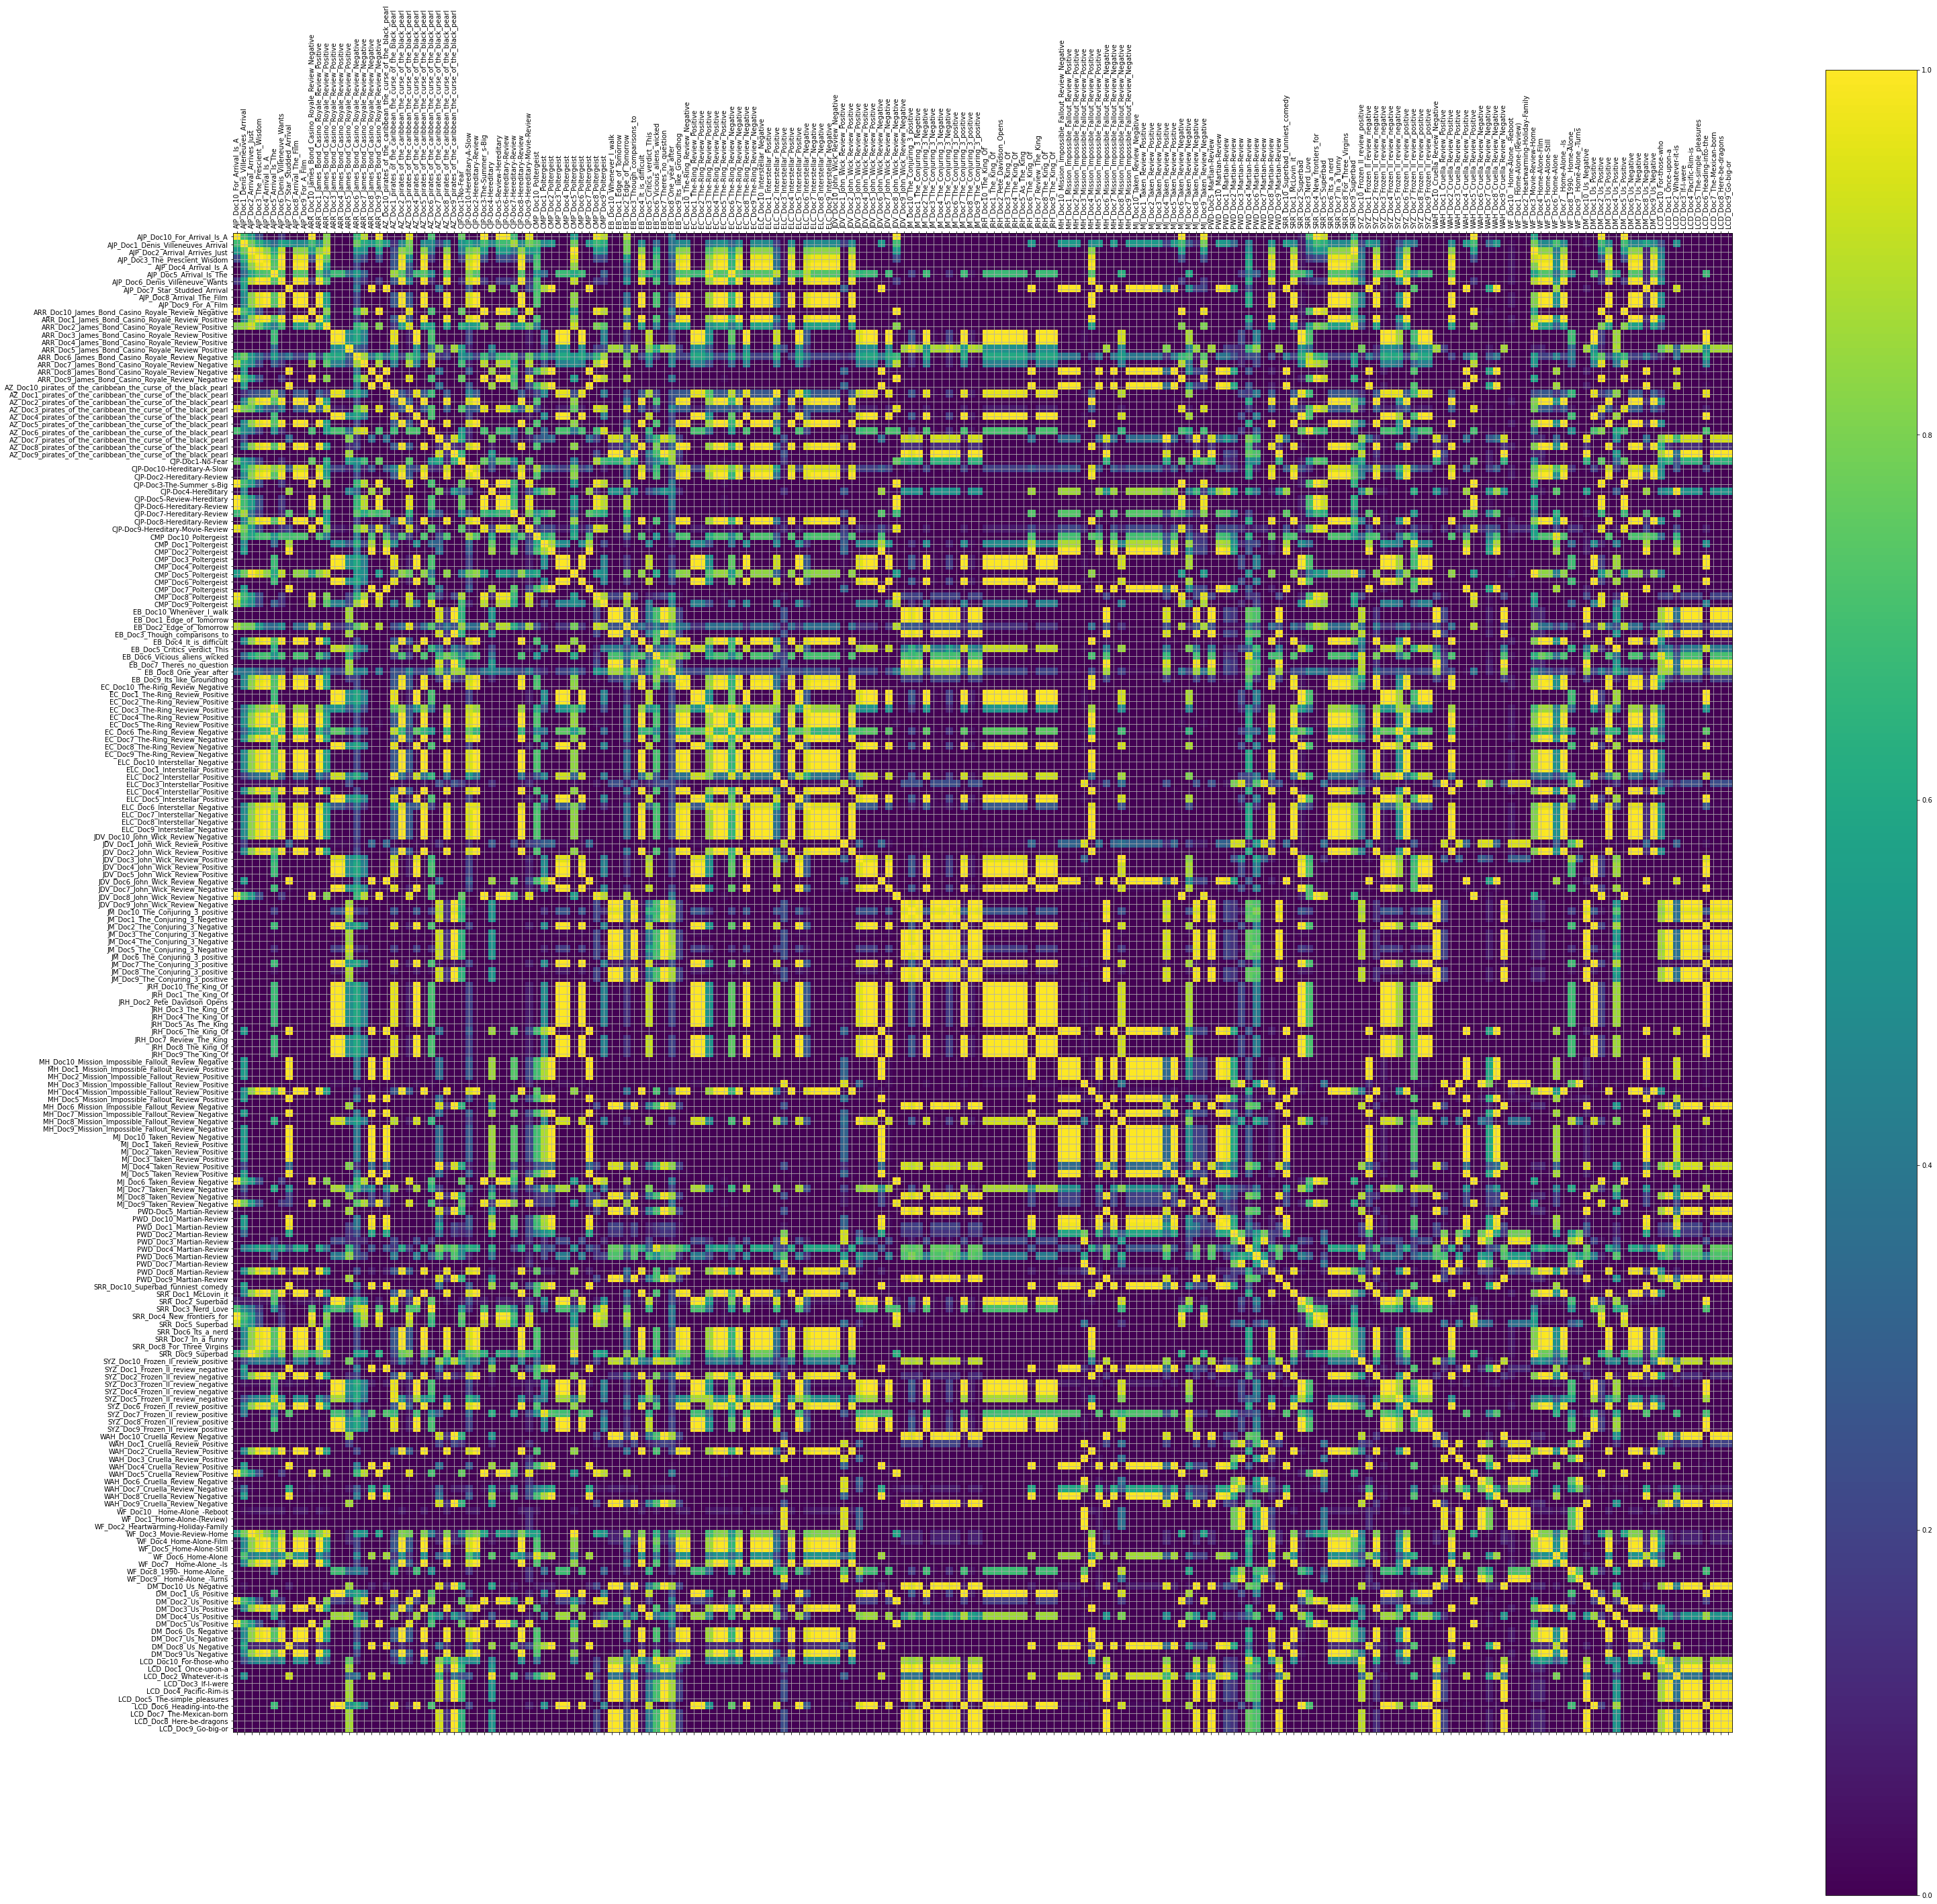

In [ ]:
#run section 2
######################################
#EXPERIMENT WITH THESE PARAMETERS
number_of_topics=6
words=10
#####################################
model2,dictionary2,index2,doctermmatrix2=create_gensim_lda_model( processed_text,number_of_topics,words)

for doc in processed_text:
    vec_bow2 = dictionary2.doc2bow(doc)
    vec2 = model2[vec_bow2]  # convert the query to embedded space
    sims2 = index2[vec2]  # perform a similarity query against the corpus
    #print(list(enumerate(sims2)))  

fig, ax = plt.subplots(figsize=(50, 50))
cax = ax.matshow(index2, interpolation='nearest')
ax.grid(True)
plt.xticks(range(len(processed_text)), titles, rotation=90);
plt.yticks(range(len(processed_text)), titles);
fig.colorbar(cax)
plt.show()

In [ ]:
#compare LSA model coherence

topics = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
coherence_values = []
for t in topics:
    ldamodel,dictionary,index, matrix = create_gensim_lda_model(processed_text,t,10)


    coherence_model_lda = CoherenceModel(model=ldamodel, dictionary=dictionary, texts=processed_text, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

    
coherence ={'2  topic 10 words':coherence_values[0],
            '4  topic 10 words':coherence_values[1],
            '6  topic 10 words':coherence_values[2],
            '8  topic 10 words':coherence_values[3],
            '10 topic 10 words':coherence_values[4],
            '12 topic 10 words':coherence_values[5],
            '14 topic 10 words':coherence_values[6],
            '16 topic 10 words':coherence_values[7],
            '18 topic 10 words':coherence_values[8],
            '20 topic 10 words':coherence_values[9],
            '22 topic 10 words':coherence_values[10],
            '24 topic 10 words':coherence_values[11],}  

print(coherence)

[(0, '0.007*"movie" + 0.003*"story" + 0.003*"first" + 0.003*"movies" + 0.002*"character" + 0.002*"action" + 0.002*"never" + 0.002*"something" + 0.002*"little" + 0.002*"films"'), (1, '0.005*"movie" + 0.003*"first" + 0.003*"story" + 0.003*"movies" + 0.002*"family" + 0.002*"world" + 0.002*"would" + 0.002*"never" + 0.002*"action" + 0.002*"something"')]
[(0, '0.005*"movie" + 0.003*"action" + 0.003*"first" + 0.003*"story" + 0.002*"never" + 0.002*"director" + 0.002*"makes" + 0.002*"movies" + 0.002*"character" + 0.002*"cruise"'), (1, '0.005*"movie" + 0.004*"story" + 0.004*"first" + 0.003*"movies" + 0.002*"family" + 0.002*"character" + 0.002*"world" + 0.002*"daughter" + 0.002*"little" + 0.002*"never"'), (2, '0.008*"movie" + 0.003*"story" + 0.003*"movies" + 0.003*"first" + 0.002*"could" + 0.002*"never" + 0.002*"world" + 0.002*"family" + 0.002*"films" + 0.002*"action"'), (3, '0.006*"movie" + 0.003*"first" + 0.003*"story" + 0.003*"something" + 0.003*"horror" + 0.002*"family" + 0.002*"little" + 0.0

## EXPERIMENT 13: Latent Semantic Analysis (Untruncated Text)

Roll back to "uncut" data

In [ ]:
data = data_untrunc.copy()

### Re-Create the variables for processed tokens (`processed_text`) and string of tokens (`final_processed_text`)

In [ ]:
#adding columns to the dataframe to store the processed text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))

#create processed text that is a list of cleaned tokens
processed_text = data['processed_text'].tolist()

#create final processed text variable (string of tokens) for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]

#create titles variable for all titles in corpus
titles = data['DSI_Title'].tolist()

In [ ]:
#plotting 4 topics and 10 words
model_6topic_10words = plot_lsa(4, 10)

In [ ]:
#compare LSA model coherence

topics = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
coherence_values = []
for t in topics:
    lsamodel,dictionary,index = create_gensim_lsa_model(processed_text,t,10)


    coherence_model_lsa = CoherenceModel(model=lsamodel, dictionary=dictionary, texts=processed_text, coherence='c_v')
    coherence_lsa = coherence_model_lsa.get_coherence()
    coherence_values.append(coherence_lsa)

    
coherence ={'2  topic 10 words':coherence_values[0],
            '4  topic 10 words':coherence_values[1],
            '6  topic 10 words':coherence_values[2],
            '8  topic 10 words':coherence_values[3],
            '10 topic 10 words':coherence_values[4],
            '12 topic 10 words':coherence_values[5],
            '14 topic 10 words':coherence_values[6],
            '16 topic 10 words':coherence_values[7],
            '18 topic 10 words':coherence_values[8],
            '20 topic 10 words':coherence_values[9],
            '22 topic 10 words':coherence_values[10],
            '24 topic 10 words':coherence_values[11],}   

print(coherence)

[(0, '0.373*"movie" + 0.181*"first" + 0.174*"movies" + 0.165*"story" + 0.118*"world" + 0.118*"films" + 0.118*"family" + 0.116*"never" + 0.114*"little" + 0.109*"character"'), (1, '0.446*"conjuring" + 0.269*"movie" + 0.255*"devil" + 0.228*"warrens" + 0.196*"horror" + -0.148*"casino" + -0.144*"royale" + -0.138*"world" + 0.119*"farmiga" + 0.114*"wilson"')]
[(0, '0.373*"movie" + 0.181*"first" + 0.174*"movies" + 0.165*"story" + 0.118*"world" + 0.118*"films" + 0.118*"family" + 0.116*"never" + 0.114*"little" + 0.109*"character"'), (1, '-0.446*"conjuring" + -0.268*"movie" + -0.255*"devil" + -0.228*"warrens" + -0.196*"horror" + 0.148*"casino" + 0.144*"royale" + 0.138*"world" + -0.119*"farmiga" + -0.114*"wilson"'), (2, '-0.269*"casino" + -0.263*"royale" + -0.231*"conjuring" + 0.221*"family" + -0.210*"first" + -0.202*"craig" + 0.181*"kevin" + -0.163*"bonds" + -0.153*"series" + 0.148*"alone"'), (3, '0.343*"kevin" + 0.283*"family" + 0.259*"alone" + 0.163*"house" + -0.155*"arrival" + -0.146*"interste

# EXPERIMENT 14: Latent Dirichlet Allocation (Untruncated Text)

[(0, '0.004*"movie" + 0.003*"first" + 0.003*"story" + 0.003*"never" + 0.002*"action" + 0.002*"films" + 0.002*"something" + 0.002*"movies" + 0.002*"still" + 0.002*"little"'), (1, '0.007*"movie" + 0.004*"first" + 0.004*"story" + 0.004*"movies" + 0.003*"films" + 0.003*"world" + 0.002*"though" + 0.002*"never" + 0.002*"little" + 0.002*"character"'), (2, '0.006*"movie" + 0.003*"action" + 0.003*"first" + 0.003*"movies" + 0.003*"story" + 0.003*"never" + 0.003*"little" + 0.003*"horror" + 0.002*"family" + 0.002*"would"'), (3, '0.004*"story" + 0.003*"movie" + 0.003*"movies" + 0.003*"first" + 0.002*"never" + 0.002*"family" + 0.002*"world" + 0.002*"action" + 0.002*"character" + 0.002*"could"'), (4, '0.010*"movie" + 0.003*"though" + 0.003*"first" + 0.003*"story" + 0.003*"movies" + 0.003*"films" + 0.002*"character" + 0.002*"world" + 0.002*"something" + 0.002*"really"'), (5, '0.007*"movie" + 0.003*"would" + 0.003*"story" + 0.002*"character" + 0.002*"first" + 0.002*"little" + 0.002*"action" + 0.002*"wo

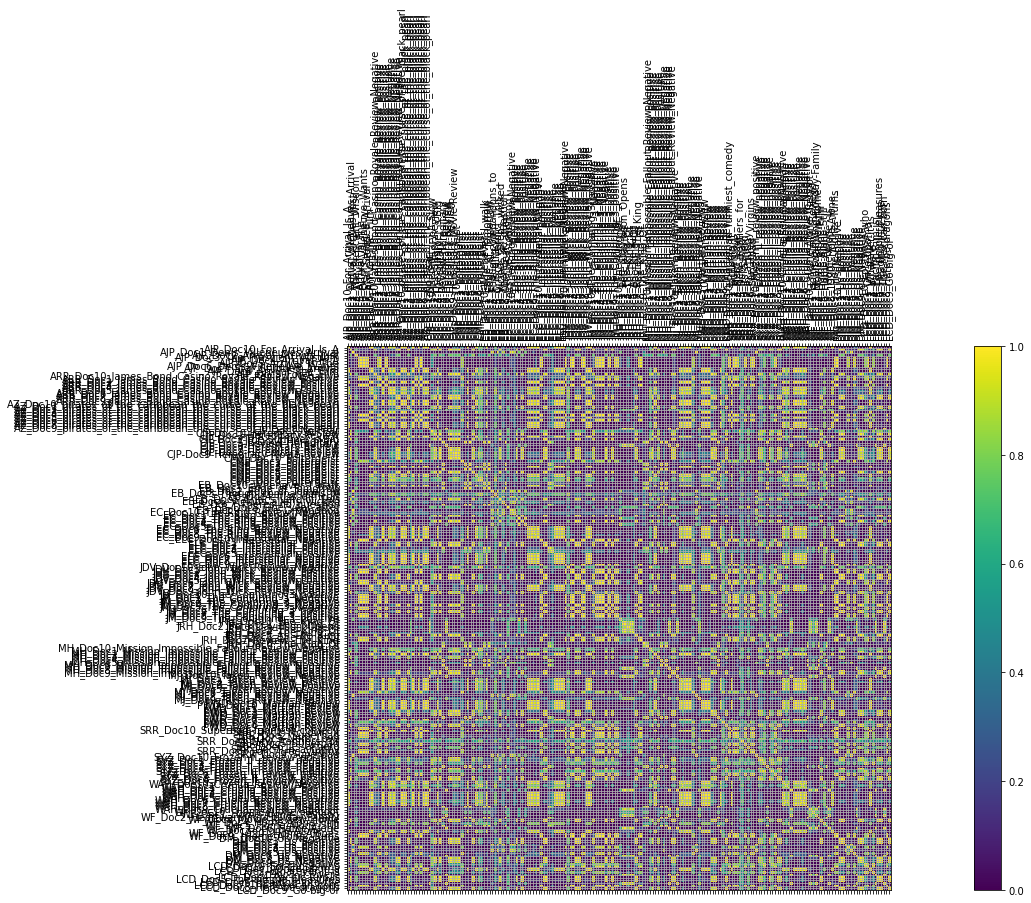

In [ ]:
#run section 2
######################################
#EXPERIMENT WITH THESE PARAMETERS
number_of_topics=6
words=10
#####################################
model2,dictionary2,index2,doctermmatrix2=create_gensim_lda_model( processed_text,number_of_topics,words)

for doc in processed_text:
    vec_bow2 = dictionary2.doc2bow(doc)
    vec2 = model2[vec_bow2]  # convert the query to embedded space
    sims2 = index2[vec2]  # perform a similarity query against the corpus
    #print(list(enumerate(sims2)))  

fig, ax = plt.subplots(figsize=(30, 10))
cax = ax.matshow(index2, interpolation='nearest')
ax.grid(True)
plt.xticks(range(len(processed_text)), titles, rotation=90);
plt.yticks(range(len(processed_text)), titles);
fig.colorbar(cax)
plt.show()

In [ ]:
#compare LSA model coherence

topics = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
coherence_values = []
for t in topics:
    ldamodel,dictionary,index, matrix = create_gensim_lda_model(processed_text,t,10)


    coherence_model_lda = CoherenceModel(model=ldamodel, dictionary=dictionary, texts=processed_text, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

    
coherence ={'2  topic 10 words':coherence_values[0],
            '4  topic 10 words':coherence_values[1],
            '6  topic 10 words':coherence_values[2],
            '8  topic 10 words':coherence_values[3],
            '10 topic 10 words':coherence_values[4],
            '12 topic 10 words':coherence_values[5],
            '14 topic 10 words':coherence_values[6],
            '16 topic 10 words':coherence_values[7],
            '18 topic 10 words':coherence_values[8],
            '20 topic 10 words':coherence_values[9],
            '22 topic 10 words':coherence_values[10],
            '24 topic 10 words':coherence_values[11],}  

print(coherence)

[(0, '0.008*"movie" + 0.004*"story" + 0.003*"first" + 0.003*"movies" + 0.002*"horror" + 0.002*"never" + 0.002*"though" + 0.002*"something" + 0.002*"little" + 0.002*"would"'), (1, '0.005*"movie" + 0.003*"first" + 0.003*"action" + 0.002*"world" + 0.002*"movies" + 0.002*"story" + 0.002*"never" + 0.002*"little" + 0.002*"character" + 0.002*"family"')]
[(0, '0.006*"movie" + 0.003*"story" + 0.003*"action" + 0.002*"first" + 0.002*"though" + 0.002*"movies" + 0.002*"world" + 0.002*"would" + 0.002*"never" + 0.002*"little"'), (1, '0.007*"movie" + 0.004*"story" + 0.003*"movies" + 0.003*"first" + 0.003*"family" + 0.003*"never" + 0.002*"horror" + 0.002*"little" + 0.002*"still" + 0.002*"something"'), (2, '0.007*"movie" + 0.004*"first" + 0.003*"story" + 0.003*"action" + 0.002*"could" + 0.002*"movies" + 0.002*"little" + 0.002*"character" + 0.002*"never" + 0.002*"films"'), (3, '0.005*"movie" + 0.003*"first" + 0.003*"story" + 0.003*"movies" + 0.002*"films" + 0.002*"action" + 0.002*"character" + 0.002*"som

## EXPERIMENT 15: Latent Semantic Analysis (Sorted by Genre)

In [ ]:
data_genre = data.sort_values(by=['Genre of Movie', 'Doc_ID'])

In [ ]:
#create processed text that is a list of cleaned tokens
processed_text = data_genre['processed_text'].tolist()

#create final processed text variable (string of tokens) for matrix creation
final_processed_text = [' '.join(x) for x in data_genre['processed_text'].tolist()]

#create titles variable for all titles in corpus
titles = data_genre['DSI_Title'].tolist()

In [ ]:
#plotting 4 topics and 10 words
model_6topic_10words = plot_lsa(20, 10)

[(0, '0.373*"movie" + 0.181*"first" + 0.174*"movies" + 0.165*"story" + 0.118*"world" + 0.118*"films" + 0.118*"family" + 0.116*"never" + 0.114*"little" + 0.109*"character"'), (1, '-0.446*"conjuring" + -0.268*"movie" + -0.255*"devil" + -0.228*"warrens" + -0.196*"horror" + 0.148*"casino" + 0.144*"royale" + 0.138*"world" + -0.118*"farmiga" + -0.114*"wilson"')]


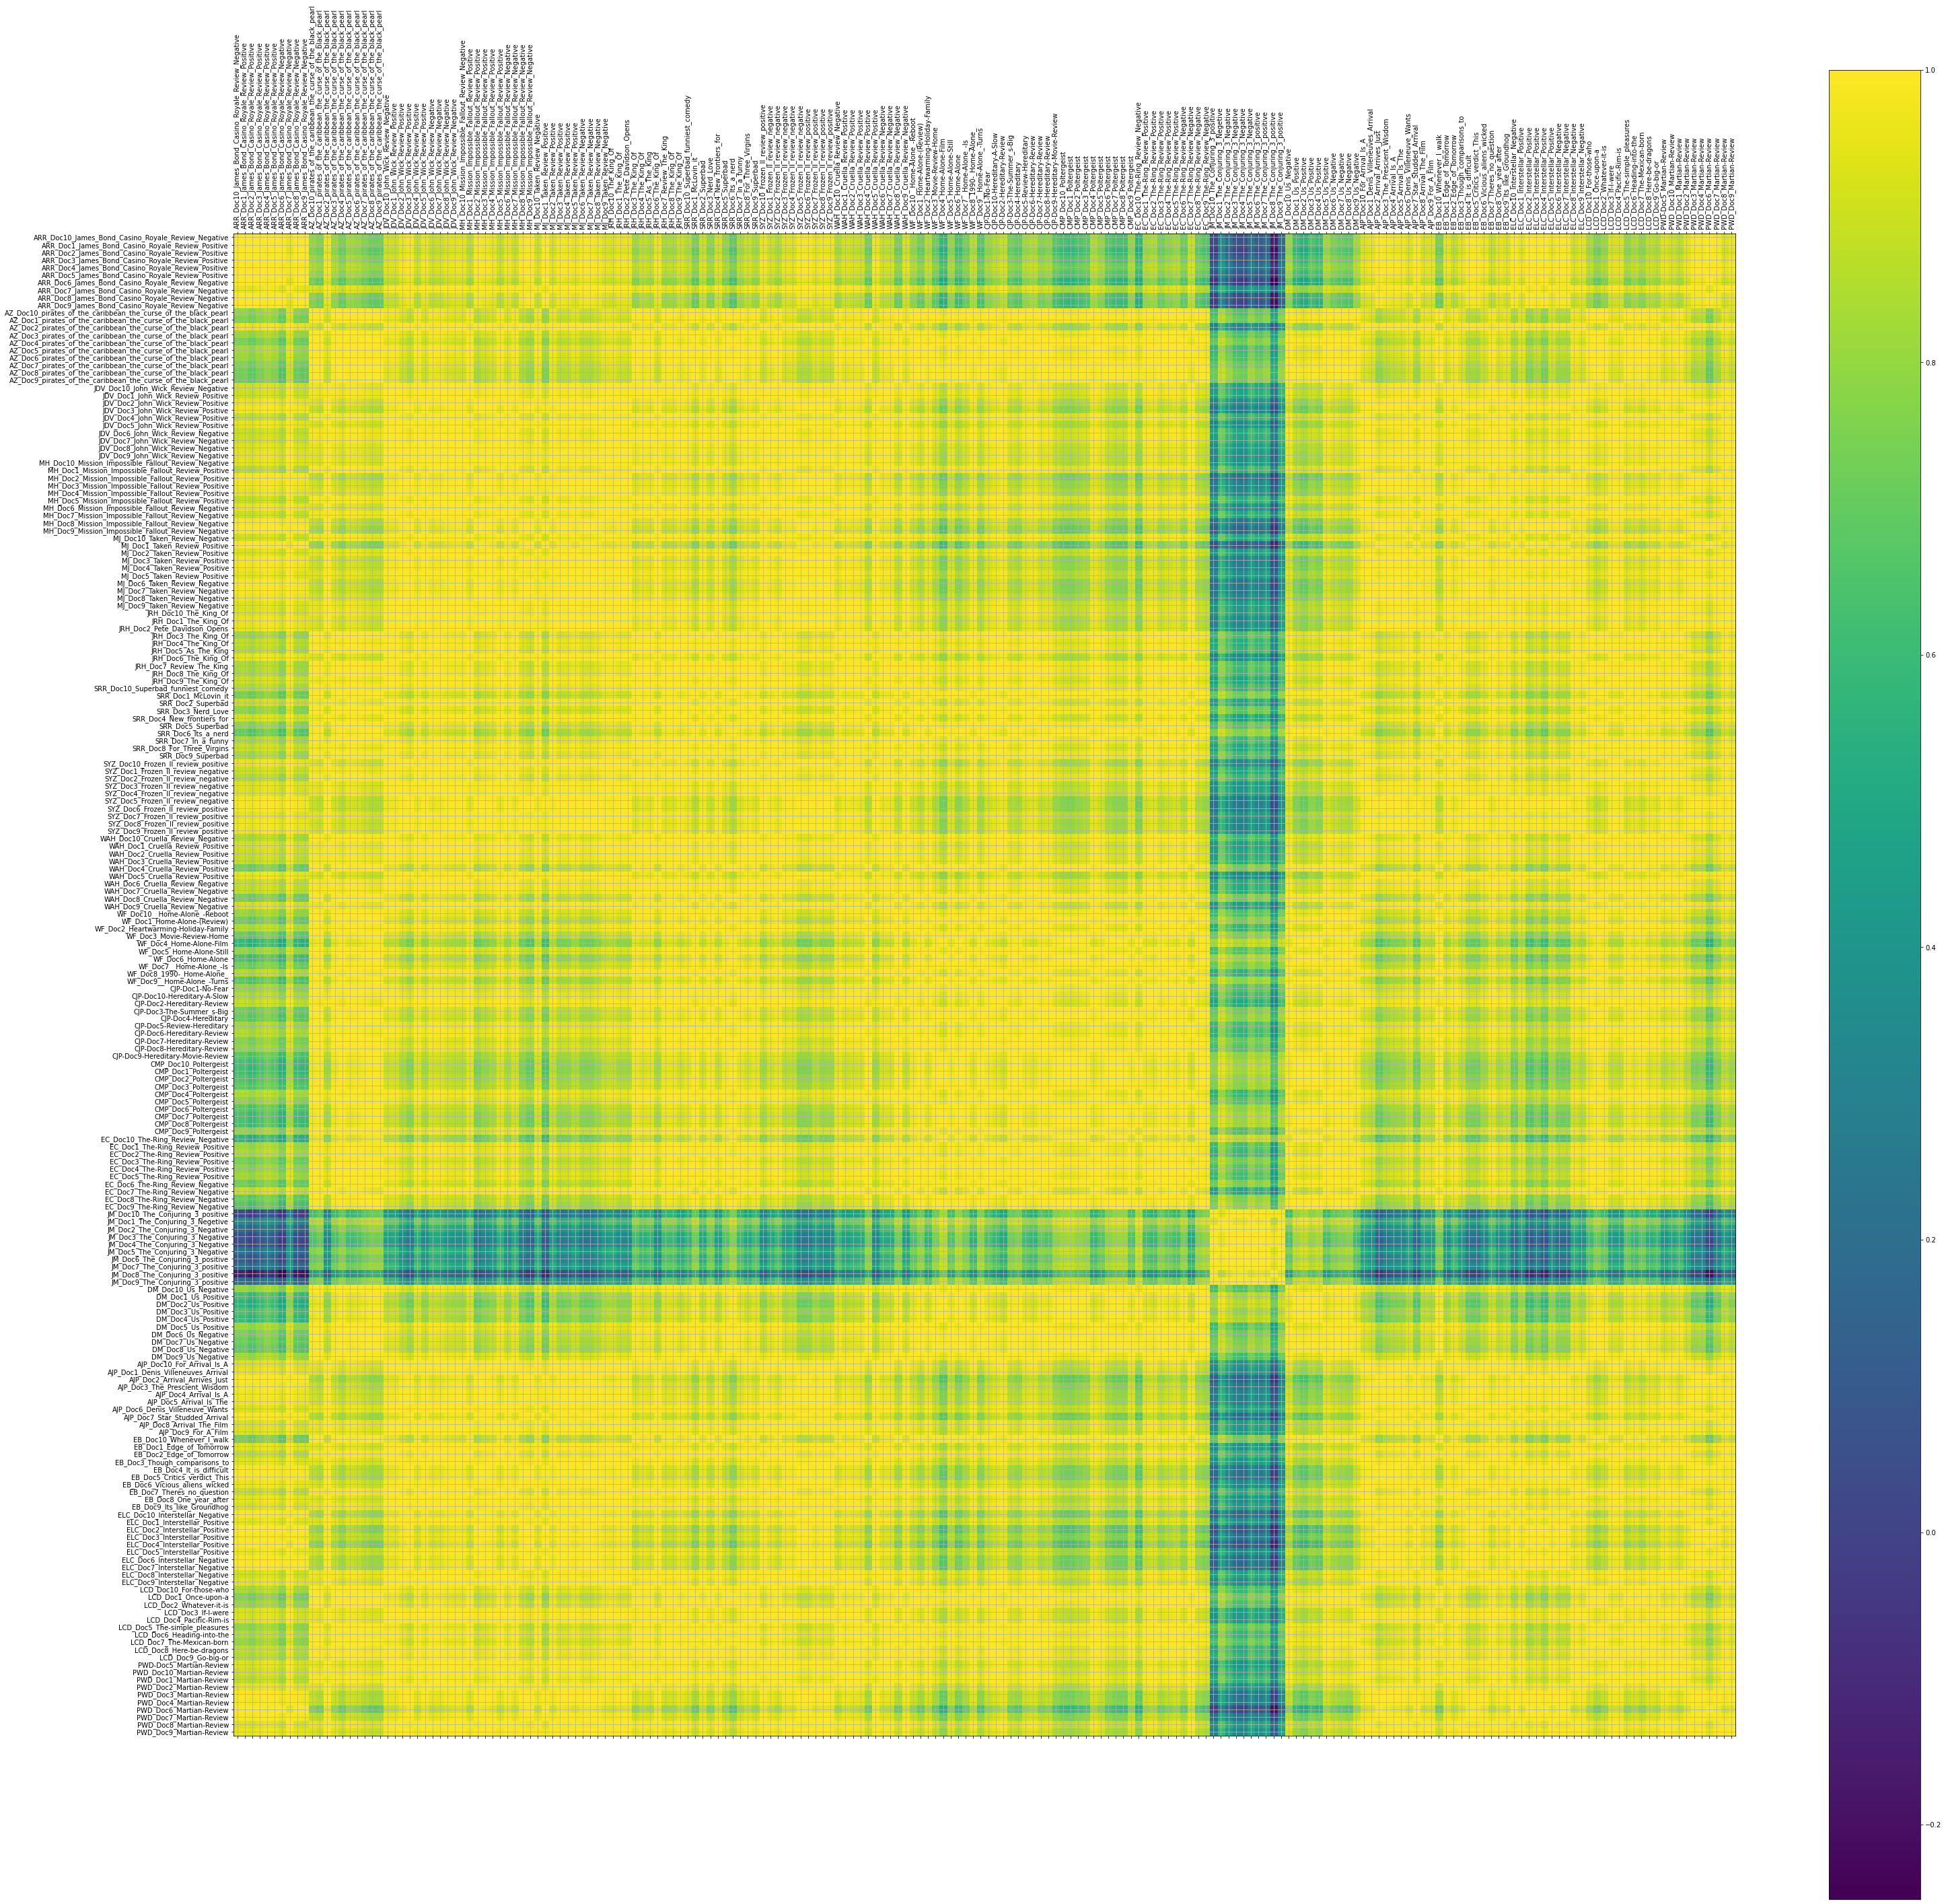

In [ ]:
#plotting 2 topics and 10 words
model_6topic_10words = plot_lsa(2, 10)

In [ ]:
#plotting 4 topics and 10 words
model_6topic_10words = plot_lsa(4, 10)

In [ ]:
#compare LSA model coherence

topics = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
coherence_values = []
for t in topics:
    lsamodel,dictionary,index = create_gensim_lsa_model(processed_text,t,10)


    coherence_model_lsa = CoherenceModel(model=lsamodel, dictionary=dictionary, texts=processed_text, coherence='c_v')
    coherence_lsa = coherence_model_lsa.get_coherence()
    coherence_values.append(coherence_lsa)

    
coherence ={'2  topic 10 words':coherence_values[0],
            '4  topic 10 words':coherence_values[1],
            '6  topic 10 words':coherence_values[2],
            '8  topic 10 words':coherence_values[3],
            '10 topic 10 words':coherence_values[4],
            '12 topic 10 words':coherence_values[5],
            '14 topic 10 words':coherence_values[6],
            '16 topic 10 words':coherence_values[7],
            '18 topic 10 words':coherence_values[8],
            '20 topic 10 words':coherence_values[9],
            '22 topic 10 words':coherence_values[10],
            '24 topic 10 words':coherence_values[11],}   

print(coherence)

[(0, '0.373*"movie" + 0.181*"first" + 0.174*"movies" + 0.165*"story" + 0.118*"world" + 0.118*"films" + 0.118*"family" + 0.116*"never" + 0.114*"little" + 0.109*"character"'), (1, '0.446*"conjuring" + 0.269*"movie" + 0.255*"devil" + 0.228*"warrens" + 0.196*"horror" + -0.148*"casino" + -0.144*"royale" + -0.138*"world" + 0.119*"farmiga" + 0.114*"wilson"')]
[(0, '0.373*"movie" + 0.181*"first" + 0.174*"movies" + 0.165*"story" + 0.118*"world" + 0.118*"films" + 0.118*"family" + 0.116*"never" + 0.114*"little" + 0.109*"character"'), (1, '0.446*"conjuring" + 0.269*"movie" + 0.255*"devil" + 0.228*"warrens" + 0.196*"horror" + -0.148*"casino" + -0.144*"royale" + -0.138*"world" + 0.118*"farmiga" + 0.114*"wilson"'), (2, '-0.269*"casino" + -0.263*"royale" + -0.231*"conjuring" + 0.221*"family" + -0.211*"first" + -0.202*"craig" + 0.182*"kevin" + -0.163*"bonds" + -0.153*"series" + 0.148*"alone"'), (3, '-0.343*"kevin" + -0.283*"family" + -0.259*"alone" + -0.163*"house" + 0.155*"arrival" + 0.146*"interstell

## EXPERIMENT 15: Latent Semantic Analysis (Sorted by Genre)

Roll back to "uncut" data

In [ ]:
data = data_trunc.copy()

### Re-Create the variables for processed tokens (`processed_text`) and string of tokens (`final_processed_text`)

In [ ]:
#adding columns to the dataframe to store the processed text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))

#create processed text that is a list of cleaned tokens
processed_text = data['processed_text'].tolist()

#create final processed text variable (string of tokens) for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]

#create titles variable for all titles in corpus
titles = data['DSI_Title'].tolist()

In [ ]:
data_genre = data.sort_values(by=['Genre of Movie', 'Doc_ID'])

In [ ]:
#create processed text that is a list of cleaned tokens
processed_text = data_genre['processed_text'].tolist()

#create final processed text variable (string of tokens) for matrix creation
final_processed_text = [' '.join(x) for x in data_genre['processed_text'].tolist()]

#create titles variable for all titles in corpus
titles = data_genre['DSI_Title'].tolist()

[(0, '0.422*"movie" + 0.191*"story" + 0.172*"first" + 0.151*"movies" + 0.117*"family" + 0.114*"character" + 0.111*"world" + 0.111*"action" + 0.109*"something" + 0.109*"never"'), (1, '-0.274*"conjuring" + -0.271*"movie" + -0.217*"kevin" + -0.203*"family" + -0.182*"alone" + -0.170*"house" + 0.166*"world" + 0.161*"action" + -0.151*"horror" + -0.142*"devil"')]


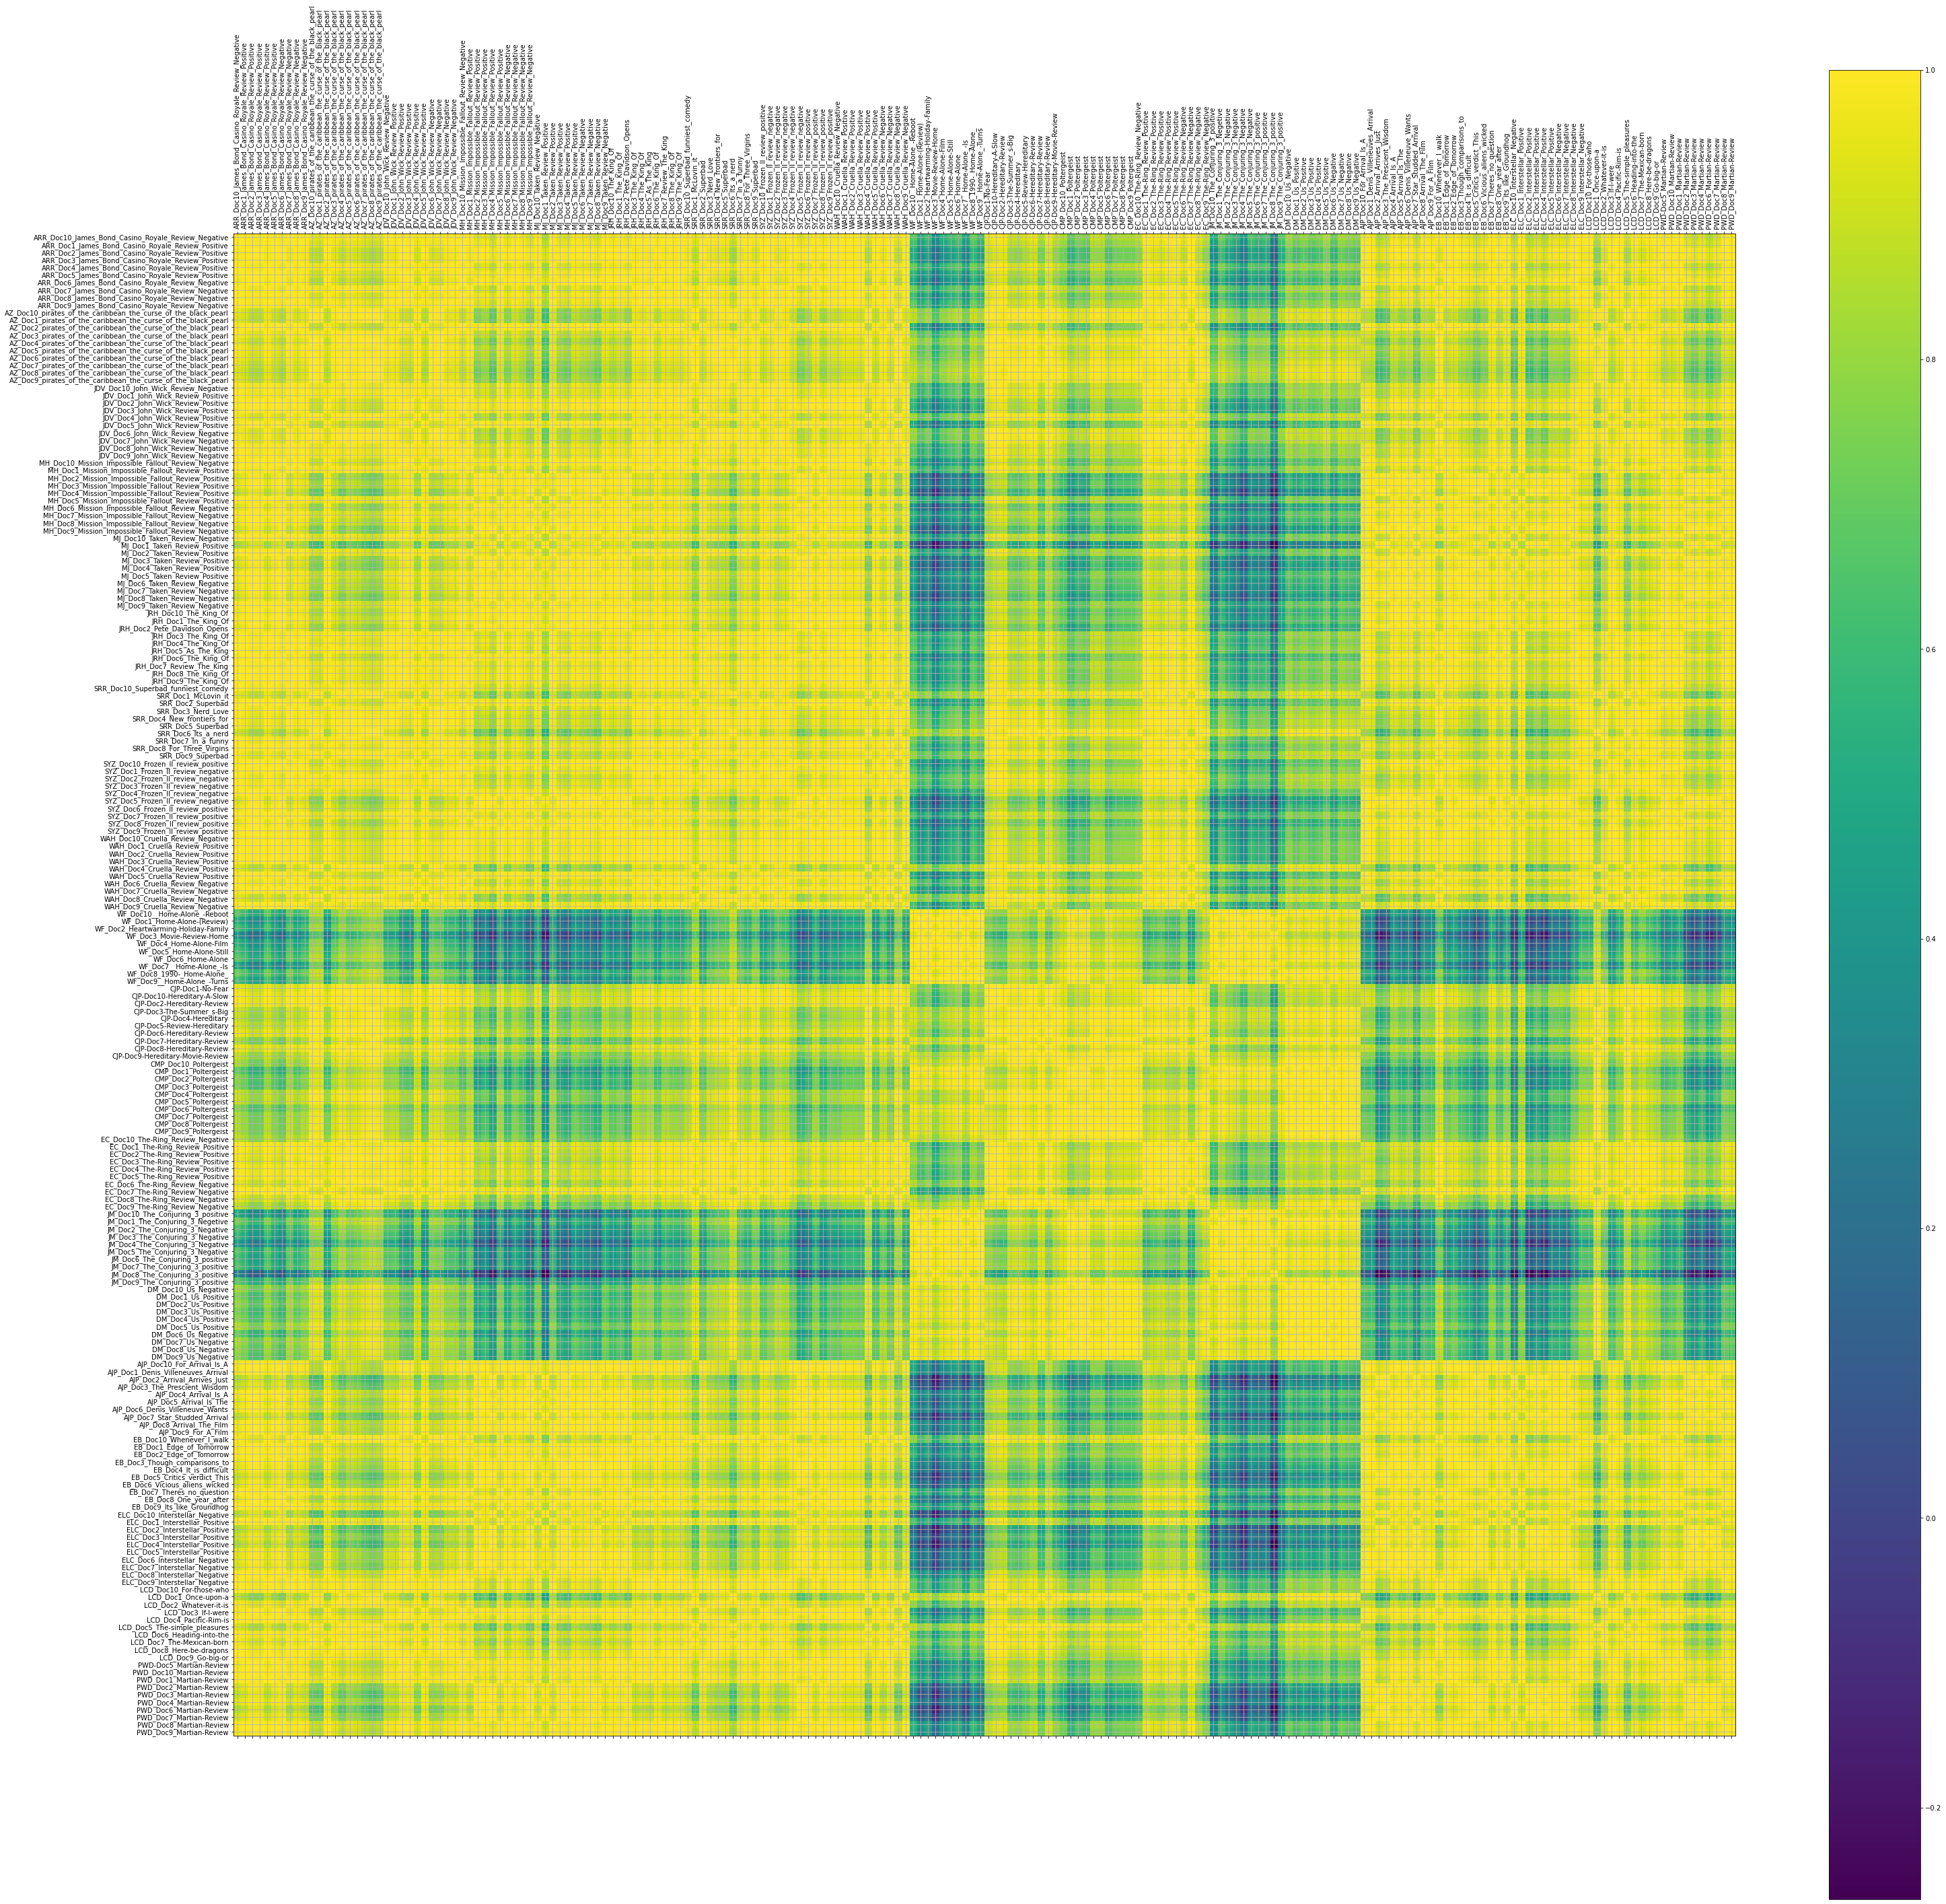

In [ ]:
#plotting 2 topics and 10 words
model_6topic_10words = plot_lsa(2, 10)

In [ ]:
#plotting 4 topics and 10 words
model_6topic_10words = plot_lsa(4, 10)

In [ ]:
#compare LSA model coherence

topics = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
coherence_values = []
for t in topics:
    lsamodel,dictionary,index = create_gensim_lsa_model(processed_text,t,10)


    coherence_model_lsa = CoherenceModel(model=lsamodel, dictionary=dictionary, texts=processed_text, coherence='c_v')
    coherence_lsa = coherence_model_lsa.get_coherence()
    coherence_values.append(coherence_lsa)

    
coherence ={'2  topic 10 words':coherence_values[0],
            '4  topic 10 words':coherence_values[1],
            '6  topic 10 words':coherence_values[2],
            '8  topic 10 words':coherence_values[3],
            '10 topic 10 words':coherence_values[4],
            '12 topic 10 words':coherence_values[5],
            '14 topic 10 words':coherence_values[6],
            '16 topic 10 words':coherence_values[7],
            '18 topic 10 words':coherence_values[8],
            '20 topic 10 words':coherence_values[9],
            '22 topic 10 words':coherence_values[10],
            '24 topic 10 words':coherence_values[11],}   

print(coherence)

[(0, '0.422*"movie" + 0.191*"story" + 0.172*"first" + 0.151*"movies" + 0.117*"family" + 0.114*"character" + 0.111*"world" + 0.111*"action" + 0.109*"something" + 0.109*"never"'), (1, '0.273*"conjuring" + 0.271*"movie" + 0.217*"kevin" + 0.203*"family" + 0.183*"alone" + 0.170*"house" + -0.166*"world" + -0.161*"action" + 0.151*"horror" + 0.142*"devil"')]
[(0, '0.422*"movie" + 0.191*"story" + 0.172*"first" + 0.151*"movies" + 0.117*"family" + 0.114*"character" + 0.111*"world" + 0.111*"action" + 0.109*"something" + 0.109*"never"'), (1, '-0.273*"conjuring" + -0.271*"movie" + -0.217*"kevin" + -0.203*"family" + -0.182*"alone" + -0.170*"house" + 0.166*"world" + 0.161*"action" + -0.151*"horror" + -0.142*"devil"'), (2, '-0.351*"conjuring" + 0.321*"kevin" + 0.281*"family" + 0.280*"alone" + -0.210*"movie" + -0.188*"devil" + 0.182*"house" + 0.165*"hughes" + -0.160*"warrens" + 0.139*"christmas"'), (3, '-0.393*"cruella" + 0.184*"cooper" + 0.175*"conjuring" + -0.152*"character" + 0.152*"interstellar" + -

## EXPERIMENT 16: Classification of Movies based on Genre

In [ ]:
data['Labels'] = np.where(((data['Genre of Movie'] == 'Sci-Fi') | 
                           (data['Genre of Movie'] == 'Action') |
                           (data['Genre of Movie'] == 'Science Fiction ')), 1, 0)


In [ ]:
sum(data['Labels'])

100

In [ ]:
inputs = data['Text']
labels = data['Labels']

In [ ]:
tfidf_matrix, tfidf_words = tfidf(inputs, titles, ngram_range = (1,1))

In [ ]:
indices = np.arange(tfidf_matrix.shape[0])

In [ ]:
tfidf_matrix = tfidf_matrix.set_index(indices)

In [ ]:
indices = np.arange(tfidf_matrix.shape[0])
np.random.shuffle(indices)
inputs = tfidf_matrix.iloc[indices]
labels = labels[indices]

x_train = inputs[:170]
y_train = labels[:170]
x_test = inputs[170:]
y_test = labels[170:]
print(x_train.shape)
print(x_test.shape)

(170, 12253)
(30, 12253)


## ***Random Forests:***



### **Develop a Random Forest to predict the sentiment (positive/negative)**


Calculate the accuracy of the model on both the training and test data set

In [ ]:
"""
RANDOM FOREST
"""

exp_16_RF = RandomForestClassifier(max_depth = 3,
                                 n_estimators = 10, 
                                 max_features = "sqrt",
                                 )
exp_16_RF = exp_16_RF.fit( x_train, y_train )

Y_Pred_train = exp_16_RF.predict(x_train)
Y_Pred_test = exp_16_RF.predict(x_test)

print("\n=============\n")
print("RANDOM FOREST\n")
print("Accuracy Train:",metrics.accuracy_score(y_train, Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(y_test, Y_Pred_test))
print("\n")



RANDOM FOREST

Accuracy Train: 0.8235294117647058
Accuracy Test: 0.7




Create a graph that shows the ROC curves for both the training and test data set. Clearly label each curve and display the Area Under the ROC curve.


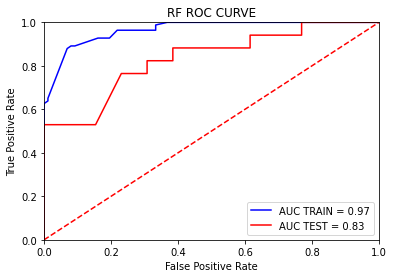

In [ ]:
probs = exp_16_RF.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train, p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = exp_16_RF.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test, p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_exp_16_RF = fpr_test
tpr_exp_16_RF = tpr_test
auc_exp_16_RF = roc_auc_test

plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Predictions

In [ ]:
pred_classes = exp_16_RF.predict(x_test)
print('shape of preds: ', pred_classes.shape)
pred_classes

shape of preds:  (30,)


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
np.array(y_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0])

#### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[12,  1],
       [ 8,  9]], dtype=int32)>

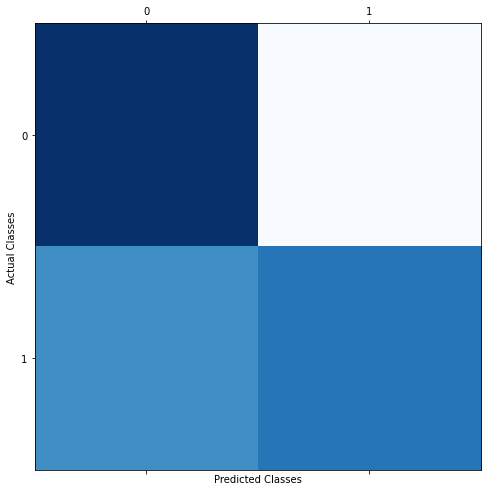

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Classification Report

In [ ]:
report_16_RF = classification_report(y_test, Y_Pred_test)

In [ ]:
print(report_16_RF)

              precision    recall  f1-score   support

           0       0.60      0.92      0.73        13
           1       0.90      0.53      0.67        17

    accuracy                           0.70        30
   macro avg       0.75      0.73      0.70        30
weighted avg       0.77      0.70      0.69        30



## ***Gradient Boosting:***



### **Develop a Gradient Boosting to predict the sentiment (positive/negative)**


Calculate the accuracy of the model on both the training and test data set

In [ ]:
"""
GRADIENT BOOSTING
"""

exp_16_GB = GradientBoostingClassifier()
exp_16_GB = exp_16_GB.fit( x_train, y_train )

Y_Pred_train = exp_16_GB.predict(x_train)
Y_Pred_test = exp_16_GB.predict(x_test)

print("\n=============\n")
print("GRADIENT BOOSTING\n")
print("Accuracy Train:",metrics.accuracy_score(y_train, Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(y_test, Y_Pred_test))
print("\n")



GRADIENT BOOSTING

Accuracy Train: 1.0
Accuracy Test: 0.9666666666666667




Create a graph that shows the ROC curves for both the training and test data set. Clearly label each curve and display the Area Under the ROC curve.


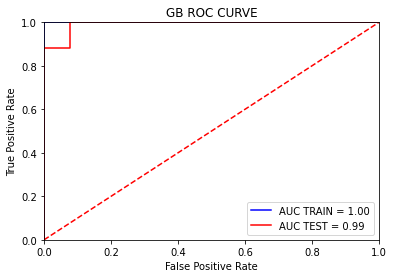

In [ ]:
probs = exp_16_GB.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train, p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = exp_16_GB.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test, p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_exp_16_GB = fpr_test
tpr_exp_16_GB = tpr_test
auc_exp_16_GB = roc_auc_test

plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Predictions

In [ ]:
pred_classes = exp_16_GB.predict(x_test)
print('shape of preds: ', pred_classes.shape)
pred_classes

shape of preds:  (30,)


array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
np.array(y_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0])

#### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[12,  1],
       [ 0, 17]], dtype=int32)>

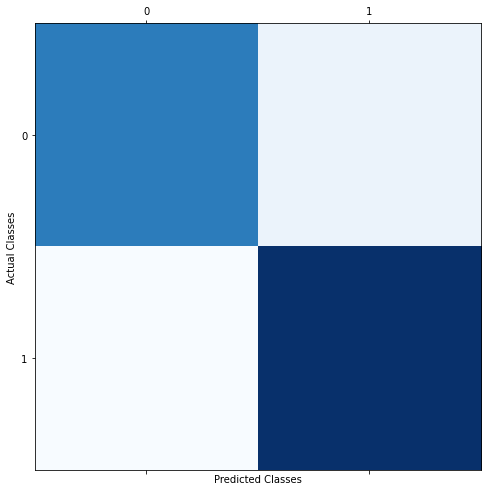

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Classification Report

In [ ]:
report_16_GB = classification_report(y_test, Y_Pred_test)

In [ ]:
print(report_16_GB)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        17

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



## SVM

In [ ]:
# Classifier Algorithm - SVM

# Create instance of SVM

exp_16_SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
exp_16_SVM.fit(x_train, y_train)

# Predict the labels on the test dataset
pred_exp_16_SVM = exp_16_SVM.predict(x_test)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score", accuracy_score(pred_exp_16_SVM, y_test)*100)

SVM Accuracy Score 100.0


In [ ]:
report_exp_16_SVM = classification_report(y_test, pred_exp_16_SVM)

In [ ]:
print(report_exp_16_SVM)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Make HTML

In [ ]:
%%shell
jupyter nbconvert --to html /content/Holst_Assignment_A_2_Assess_Clustering_LSA_and_Classification.ipynb

[NbConvertApp] Converting notebook /content/Holst_Assignment_A_2_Assess_Clustering_LSA_and_Classification.ipynb to html
[NbConvertApp] Writing 18337185 bytes to /content/Holst_Assignment_A_2_Assess_Clustering_LSA_and_Classification.html
